In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import skew, shapiro, levene, ttest_ind, mannwhitneyu
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Load Data

In [2]:
# load data
data = pd.read_excel('Adidas US Sales Datasets.xlsx')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,NaN,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,NaN,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


# Data Cleaning

1. Handle missing values and set header

In [3]:
# check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [4]:
# column unnamed : 0 has only null values, drop it
data = data.drop(columns=['Unnamed: 0'])
data.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [5]:
# show column names
data.columns

Index(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [6]:
# set header
data = data.iloc[3:].reset_index(drop=True)

new_header = data.iloc[0]  # grab the first row for the header
data = data[1:]             # take the data less the header row
data.columns = new_header   # set the header row as the header

# display the updated dataframe
data.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [7]:
# show column names
data.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=0)

In [8]:
# check for null values and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


2. Check for duplicating rows

In [9]:
# check for duplicated rows
duplicate = data[data.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


No null values or duplicating rows found.

3. Data type conversion

In [10]:
# convert retailer ID, units sold to int
int_cols = ['Retailer ID', 'Units Sold']
for col in int_cols:
    data[col] = data[col].astype(int)

# convert invoice date to datetime, extract year, month, day, day of week and quarter into new column
data['Invoice Date'] = pd.to_datetime(data['Invoice Date'], errors='coerce')
data['Year'] = pd.to_datetime(data['Invoice Date'], errors='coerce').dt.year
data['Month'] = pd.to_datetime(data['Invoice Date'], errors='coerce').dt.month
data['Day'] = pd.to_datetime(data['Invoice Date'], errors='coerce').dt.day
data['Day of Week'] = data['Invoice Date'].dt.day_name()

data['Quarter'] = data['Invoice Date'].dt.to_period('Q')

# convert price per unit, total sales, operating profit, operating margin to float
float_cols = ['Price per Unit', 'Total Sales', 'Operating Profit', 'Operating Margin']
for col in float_cols:
    data[col] = data[col].astype(float).round(2)

In [11]:
# extract gender from product into new column
data['Gender'] = data['Product'].str.extract(r"^(.*)'s", expand=False)
data['Product'] = data['Product'].str.extract(r"'s (.*)$", expand=False)
data.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Month,Day,Day of Week,Quarter,Gender
1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020,1,1,Wednesday,2020Q1,Men
2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020,1,2,Thursday,2020Q1,Men
3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020,1,3,Friday,2020Q1,Women
4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020,1,4,Saturday,2020Q1,Women
5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020,1,5,Sunday,2020Q1,Men


In [12]:
data['Price Change'] = data.groupby('Product')['Price per Unit'].diff()
data['Sales Volume Change'] = data.groupby('Product')['Units Sold'].diff()
data['Profitability Change'] = data.groupby('Product')['Operating Profit'].diff()

# Filter out rows where changes are NaN (first differences)
data = data.dropna(subset=['Price Change', 'Sales Volume Change', 'Profitability Change'])
data

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Sales Method,Year,Month,Day,Day of Week,Quarter,Gender,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Street Footwear,40.0,1000,400000.0,...,In-store,2020,1,3,Friday,2020Q1,Women,-10.0,-200.0,-160000.00
4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Athletic Footwear,45.0,850,382500.0,...,In-store,2020,1,4,Saturday,2020Q1,Women,-5.0,-150.0,-16125.00
6,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Apparel,50.0,1000,500000.0,...,In-store,2020,1,6,Monday,2020Q1,Women,-10.0,100.0,-37000.00
7,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Street Footwear,50.0,1250,625000.0,...,In-store,2020,1,7,Tuesday,2020Q1,Men,10.0,250.0,172500.00
8,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Athletic Footwear,50.0,900,450000.0,...,Outlet,2020,1,8,Wednesday,2020Q1,Men,5.0,50.0,1125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Apparel,50.0,64,3200.0,...,Outlet,2021,1,24,Sunday,2021Q1,Men,-11.0,-80.0,-2617.60
9645,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Apparel,41.0,105,4305.0,...,Outlet,2021,1,24,Sunday,2021Q1,Women,-9.0,41.0,481.60
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Street Footwear,41.0,184,7544.0,...,Outlet,2021,2,22,Monday,2021Q1,Men,6.0,85.0,1855.73
9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Athletic Footwear,42.0,70,2940.0,...,Outlet,2021,2,22,Monday,2021Q1,Men,9.0,19.0,763.56


In [13]:
data.info() # after conversion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 3 to 9648
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Retailer              9645 non-null   object        
 1   Retailer ID           9645 non-null   int32         
 2   Invoice Date          9645 non-null   datetime64[ns]
 3   Region                9645 non-null   object        
 4   State                 9645 non-null   object        
 5   City                  9645 non-null   object        
 6   Product               9645 non-null   object        
 7   Price per Unit        9645 non-null   float64       
 8   Units Sold            9645 non-null   int32         
 9   Total Sales           9645 non-null   float64       
 10  Operating Profit      9645 non-null   float64       
 11  Operating Margin      9645 non-null   float64       
 12  Sales Method          9645 non-null   object        
 13  Year              

In [14]:
# print unique values in selected columns
columns = ['Retailer', 'Retailer ID', 'Region', 'State','City', 'Product','Price per Unit','Sales Method','Gender']
for c in columns:
    unique_values = data[c].unique()
    print(f"Unique values in '{c}': {sorted(unique_values)}\n")

Unique values in 'Retailer': ['Amazon', 'Foot Locker', "Kohl's", 'Sports Direct', 'Walmart', 'West Gear']

Unique values in 'Retailer ID': [1128299, 1185732, 1189833, 1197831]

Unique values in 'Region': ['Midwest', 'Northeast', 'South', 'Southeast', 'West']

Unique values in 'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

Unique values in 'City': ['Albany', 'Albuquerque', 'Anchorage', 'Atlanta', 'Baltimore', 'B

4. Handle inconsistent columns

Note that there are 5 retailers but 4 retailer ID. Remove retailer ID due to inconsistencies.

In [15]:
# drop retailer ID column (due to inconsistencies)
data = data.drop(columns=['Retailer ID'])
data

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,...,Sales Method,Year,Month,Day,Day of Week,Quarter,Gender,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,Northeast,New York,New York,Street Footwear,40.0,1000,400000.0,140000.00,...,In-store,2020,1,3,Friday,2020Q1,Women,-10.0,-200.0,-160000.00
4,Foot Locker,2020-01-04,Northeast,New York,New York,Athletic Footwear,45.0,850,382500.0,133875.00,...,In-store,2020,1,4,Saturday,2020Q1,Women,-5.0,-150.0,-16125.00
6,Foot Locker,2020-01-06,Northeast,New York,New York,Apparel,50.0,1000,500000.0,125000.00,...,In-store,2020,1,6,Monday,2020Q1,Women,-10.0,100.0,-37000.00
7,Foot Locker,2020-01-07,Northeast,New York,New York,Street Footwear,50.0,1250,625000.0,312500.00,...,In-store,2020,1,7,Tuesday,2020Q1,Men,10.0,250.0,172500.00
8,Foot Locker,2020-01-08,Northeast,New York,New York,Athletic Footwear,50.0,900,450000.0,135000.00,...,Outlet,2020,1,8,Wednesday,2020Q1,Men,5.0,50.0,1125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Apparel,50.0,64,3200.0,896.00,...,Outlet,2021,1,24,Sunday,2021Q1,Men,-11.0,-80.0,-2617.60
9645,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Apparel,41.0,105,4305.0,1377.60,...,Outlet,2021,1,24,Sunday,2021Q1,Women,-9.0,41.0,481.60
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Street Footwear,41.0,184,7544.0,2791.28,...,Outlet,2021,2,22,Monday,2021Q1,Men,6.0,85.0,1855.73
9647,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Athletic Footwear,42.0,70,2940.0,1234.80,...,Outlet,2021,2,22,Monday,2021Q1,Men,9.0,19.0,763.56


In [16]:
# rearrange columns
data = data[['Retailer', 'Invoice Date', 'Quarter', 'Year', 'Month', 'Day', 'Day of Week', 'Region', 'State', 'City', 'Gender', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method', 'Price Change', 'Sales Volume Change', 'Profitability Change']]
data

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,...,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,2020Q1,2020,1,3,Friday,Northeast,New York,New York,...,Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store,-10.0,-200.0,-160000.00
4,Foot Locker,2020-01-04,2020Q1,2020,1,4,Saturday,Northeast,New York,New York,...,Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store,-5.0,-150.0,-16125.00
6,Foot Locker,2020-01-06,2020Q1,2020,1,6,Monday,Northeast,New York,New York,...,Apparel,50.0,1000,500000.0,125000.00,0.25,In-store,-10.0,100.0,-37000.00
7,Foot Locker,2020-01-07,2020Q1,2020,1,7,Tuesday,Northeast,New York,New York,...,Street Footwear,50.0,1250,625000.0,312500.00,0.50,In-store,10.0,250.0,172500.00
8,Foot Locker,2020-01-08,2020Q1,2020,1,8,Wednesday,Northeast,New York,New York,...,Athletic Footwear,50.0,900,450000.0,135000.00,0.30,Outlet,5.0,50.0,1125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,...,Apparel,50.0,64,3200.0,896.00,0.28,Outlet,-11.0,-80.0,-2617.60
9645,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,...,Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,-9.0,41.0,481.60
9646,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,...,Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,6.0,85.0,1855.73
9647,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,...,Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,9.0,19.0,763.56


Note that there are inconsistencies in total sales (total sales != price per unit * units sold). Recalculate total sales.

In [17]:
# recalculate total sales
data['Total Sales'] = data['Price per Unit'] * data['Units Sold']
data

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,...,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,2020Q1,2020,1,3,Friday,Northeast,New York,New York,...,Street Footwear,40.0,1000,40000.0,140000.00,0.35,In-store,-10.0,-200.0,-160000.00
4,Foot Locker,2020-01-04,2020Q1,2020,1,4,Saturday,Northeast,New York,New York,...,Athletic Footwear,45.0,850,38250.0,133875.00,0.35,In-store,-5.0,-150.0,-16125.00
6,Foot Locker,2020-01-06,2020Q1,2020,1,6,Monday,Northeast,New York,New York,...,Apparel,50.0,1000,50000.0,125000.00,0.25,In-store,-10.0,100.0,-37000.00
7,Foot Locker,2020-01-07,2020Q1,2020,1,7,Tuesday,Northeast,New York,New York,...,Street Footwear,50.0,1250,62500.0,312500.00,0.50,In-store,10.0,250.0,172500.00
8,Foot Locker,2020-01-08,2020Q1,2020,1,8,Wednesday,Northeast,New York,New York,...,Athletic Footwear,50.0,900,45000.0,135000.00,0.30,Outlet,5.0,50.0,1125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,...,Apparel,50.0,64,3200.0,896.00,0.28,Outlet,-11.0,-80.0,-2617.60
9645,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,...,Apparel,41.0,105,4305.0,1377.60,0.32,Outlet,-9.0,41.0,481.60
9646,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,...,Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet,6.0,85.0,1855.73
9647,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,...,Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet,9.0,19.0,763.56


In [18]:
# recalculate operating profit (affected since total sales is recalculated)
data['Operating Profit'] = data['Operating Margin'] * data['Total Sales']
data.head(5)

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,...,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,2020Q1,2020,1,3,Friday,Northeast,New York,New York,...,Street Footwear,40.0,1000,40000.0,14000.0,0.35,In-store,-10.0,-200.0,-160000.0
4,Foot Locker,2020-01-04,2020Q1,2020,1,4,Saturday,Northeast,New York,New York,...,Athletic Footwear,45.0,850,38250.0,13387.5,0.35,In-store,-5.0,-150.0,-16125.0
6,Foot Locker,2020-01-06,2020Q1,2020,1,6,Monday,Northeast,New York,New York,...,Apparel,50.0,1000,50000.0,12500.0,0.25,In-store,-10.0,100.0,-37000.0
7,Foot Locker,2020-01-07,2020Q1,2020,1,7,Tuesday,Northeast,New York,New York,...,Street Footwear,50.0,1250,62500.0,31250.0,0.50,In-store,10.0,250.0,172500.0
8,Foot Locker,2020-01-08,2020Q1,2020,1,8,Wednesday,Northeast,New York,New York,...,Athletic Footwear,50.0,900,45000.0,13500.0,0.30,Outlet,5.0,50.0,1125.0


In [19]:
# check inconsistencies in operating margin
operating_margin_1 = data[data['Operating Margin'] > 1].shape[0]
print(f"Total number of rows where Operating Margin > 1: {operating_margin_1}")

Total number of rows where Operating Margin > 1: 0


In [20]:
# check for inconsistencies in total sales, operating profit and operating margin
display(data[
    (data['Price per Unit'] <= 0) |
    (data['Units Sold'] <= 0) |
    (data['Total Sales'] <= 0) |
    (data['Operating Profit'] <= 0) |
    (data['Operating Margin'] <= 0)
])

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,...,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Price Change,Sales Volume Change,Profitability Change
1020,Foot Locker,2021-06-05,2021Q2,2021,6,5,Saturday,Midwest,Nebraska,Omaha,...,Athletic Footwear,35.0,0,0.0,0.0,0.40,Outlet,-5.0,-100.0,-14000.00
1026,Foot Locker,2021-06-11,2021Q2,2021,6,11,Friday,Midwest,Nebraska,Omaha,...,Athletic Footwear,30.0,0,0.0,0.0,0.40,Outlet,-5.0,-75.0,-9187.50
4908,Foot Locker,2021-06-05,2021Q2,2021,6,5,Saturday,Midwest,Nebraska,Omaha,...,Athletic Footwear,33.0,0,0.0,0.0,0.55,Online,-6.0,-26.0,-466.44
4914,Foot Locker,2021-06-11,2021Q2,2021,6,11,Friday,Midwest,Nebraska,Omaha,...,Athletic Footwear,27.0,0,0.0,0.0,0.53,Online,-5.0,-23.0,-331.20


In [21]:
# drop Operating Margin and Sales Method columns (due to not in use)
data = data.drop(columns=['Operating Margin'])
data = data.drop(columns=['Sales Method'])
data.head(5)

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,Gender,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,2020Q1,2020,1,3,Friday,Northeast,New York,New York,Women,Street Footwear,40.0,1000,40000.0,14000.0,-10.0,-200.0,-160000.0
4,Foot Locker,2020-01-04,2020Q1,2020,1,4,Saturday,Northeast,New York,New York,Women,Athletic Footwear,45.0,850,38250.0,13387.5,-5.0,-150.0,-16125.0
6,Foot Locker,2020-01-06,2020Q1,2020,1,6,Monday,Northeast,New York,New York,Women,Apparel,50.0,1000,50000.0,12500.0,-10.0,100.0,-37000.0
7,Foot Locker,2020-01-07,2020Q1,2020,1,7,Tuesday,Northeast,New York,New York,Men,Street Footwear,50.0,1250,62500.0,31250.0,10.0,250.0,172500.0
8,Foot Locker,2020-01-08,2020Q1,2020,1,8,Wednesday,Northeast,New York,New York,Men,Athletic Footwear,50.0,900,45000.0,13500.0,5.0,50.0,1125.0


In [22]:
# print unique values in columns (after cleaning)
columns = ['Retailer', 'Quarter', 'Year', 'Month', 'Day', 'Day of Week', 
           'Region', 'State', 'City', 'Gender', 'Product']

for c in columns:
    unique_values = data[c].unique()
    print(f"Unique values in '{c}': {sorted(unique_values)}\n")

Unique values in 'Retailer': ['Amazon', 'Foot Locker', "Kohl's", 'Sports Direct', 'Walmart', 'West Gear']

Unique values in 'Quarter': [Period('2020Q1', 'Q-DEC'), Period('2020Q2', 'Q-DEC'), Period('2020Q3', 'Q-DEC'), Period('2020Q4', 'Q-DEC'), Period('2021Q1', 'Q-DEC'), Period('2021Q2', 'Q-DEC'), Period('2021Q3', 'Q-DEC'), Period('2021Q4', 'Q-DEC')]

Unique values in 'Year': [2020, 2021]

Unique values in 'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Unique values in 'Day': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]

Unique values in 'Day of Week': ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Unique values in 'Region': ['Midwest', 'Northeast', 'South', 'Southeast', 'West']

Unique values in 'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',

In [23]:
# cleaned data
data

,Retailer,Invoice Date,Quarter,Year,Month,Day,Day of Week,Region,State,City,Gender,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Price Change,Sales Volume Change,Profitability Change
3,Foot Locker,2020-01-03,2020Q1,2020,1,3,Friday,Northeast,New York,New York,Women,Street Footwear,40.0,1000,40000.0,14000.00,-10.0,-200.0,-160000.00
4,Foot Locker,2020-01-04,2020Q1,2020,1,4,Saturday,Northeast,New York,New York,Women,Athletic Footwear,45.0,850,38250.0,13387.50,-5.0,-150.0,-16125.00
6,Foot Locker,2020-01-06,2020Q1,2020,1,6,Monday,Northeast,New York,New York,Women,Apparel,50.0,1000,50000.0,12500.00,-10.0,100.0,-37000.00
7,Foot Locker,2020-01-07,2020Q1,2020,1,7,Tuesday,Northeast,New York,New York,Men,Street Footwear,50.0,1250,62500.0,31250.00,10.0,250.0,172500.00
8,Foot Locker,2020-01-08,2020Q1,2020,1,8,Wednesday,Northeast,New York,New York,Men,Athletic Footwear,50.0,900,45000.0,13500.00,5.0,50.0,1125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,Men,Apparel,50.0,64,3200.0,896.00,-11.0,-80.0,-2617.60
9645,Foot Locker,2021-01-24,2021Q1,2021,1,24,Sunday,Northeast,New Hampshire,Manchester,Women,Apparel,41.0,105,4305.0,1377.60,-9.0,41.0,481.60
9646,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,Men,Street Footwear,41.0,184,7544.0,2791.28,6.0,85.0,1855.73
9647,Foot Locker,2021-02-22,2021Q1,2021,2,22,Monday,Northeast,New Hampshire,Manchester,Men,Athletic Footwear,42.0,70,2940.0,1234.80,9.0,19.0,763.56


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9645 entries, 3 to 9648
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Retailer              9645 non-null   object        
 1   Invoice Date          9645 non-null   datetime64[ns]
 2   Quarter               9645 non-null   period[Q-DEC] 
 3   Year                  9645 non-null   int64         
 4   Month                 9645 non-null   int64         
 5   Day                   9645 non-null   int64         
 6   Day of Week           9645 non-null   object        
 7   Region                9645 non-null   object        
 8   State                 9645 non-null   object        
 9   City                  9645 non-null   object        
 10  Gender                9645 non-null   object        
 11  Product               9645 non-null   object        
 12  Price per Unit        9645 non-null   float64       
 13  Units Sold        

In [25]:
data.shape

(9645, 19)

Done data cleaning

# EDA

1. Distribution of numerical variables and non-numerical variables

In [26]:
# summary for numeric columns
data.describe()

,Year,Month,Day,Price per Unit,Units Sold,Total Sales,Operating Profit,Price Change,Sales Volume Change,Profitability Change
count,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000
mean,2020.865319,6.459824,14.700052,45.214101,256.688543,12441.954381,4889.970731,-0.004977,-0.294660,-63.114330
std,0.341400,3.453995,7.346037,14.706752,213.835915,12696.347010,4858.047393,10.284423,129.230587,40185.529483
min,2020.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,-55.000000,-725.000000,-322500.000000
25%,2021.000000,3.000000,9.000000,35.000000,106.000000,4060.000000,1753.050000,-6.000000,-71.000000,-2338.880000
50%,2021.000000,6.000000,15.000000,45.000000,176.000000,7800.000000,3261.440000,0.000000,-2.000000,-17.320000
75%,2021.000000,9.000000,21.000000,55.000000,350.000000,15792.000000,6187.500000,6.000000,72.000000,2259.090000
max,2021.000000,12.000000,31.000000,110.000000,1275.000000,82500.000000,39000.000000,50.000000,550.000000,285750.000000


In [27]:
# summary for non numeric columns
data.describe(include=['object'])

,Retailer,Day of Week,Region,State,City,Gender,Product
count,9645,9645,9645,9645,9645,9645,9645
unique,6,7,5,50,52,2,3
top,Foot Locker,Tuesday,West,California,Portland,Men,Street Footwear
freq,2634,1490,2448,432,360,4823,3217


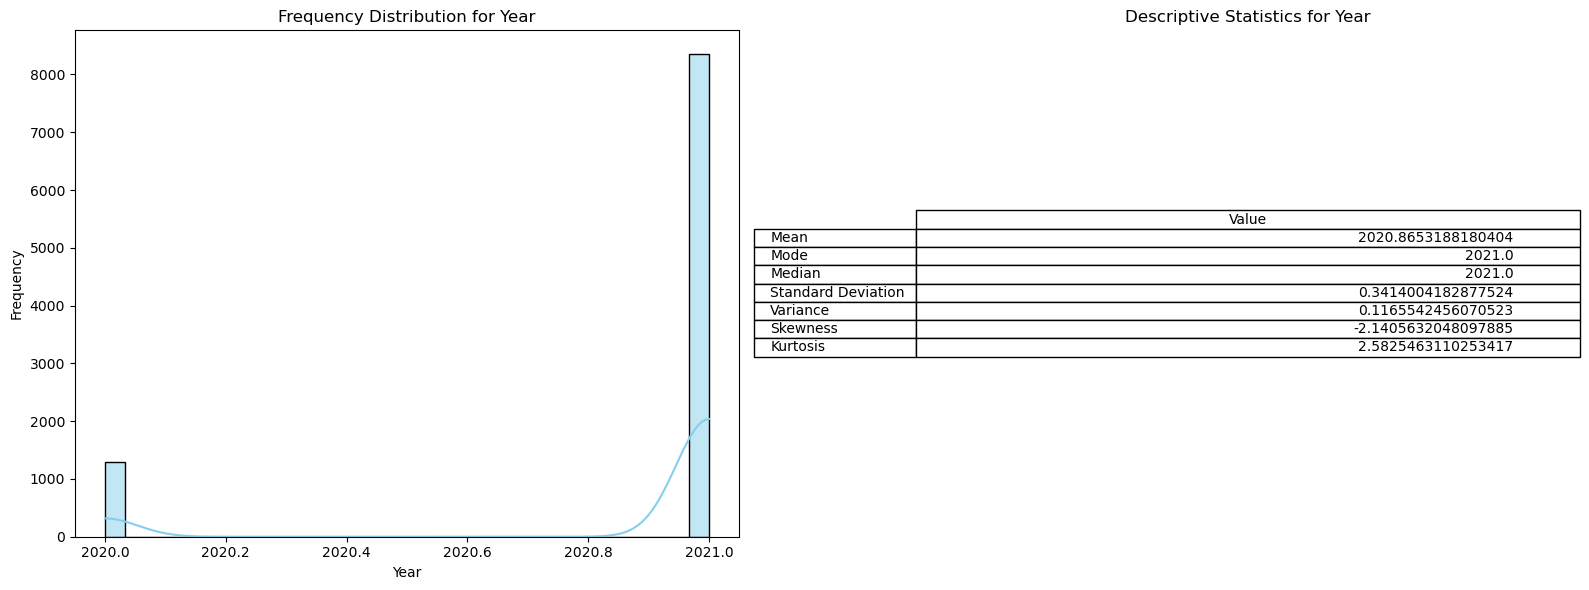

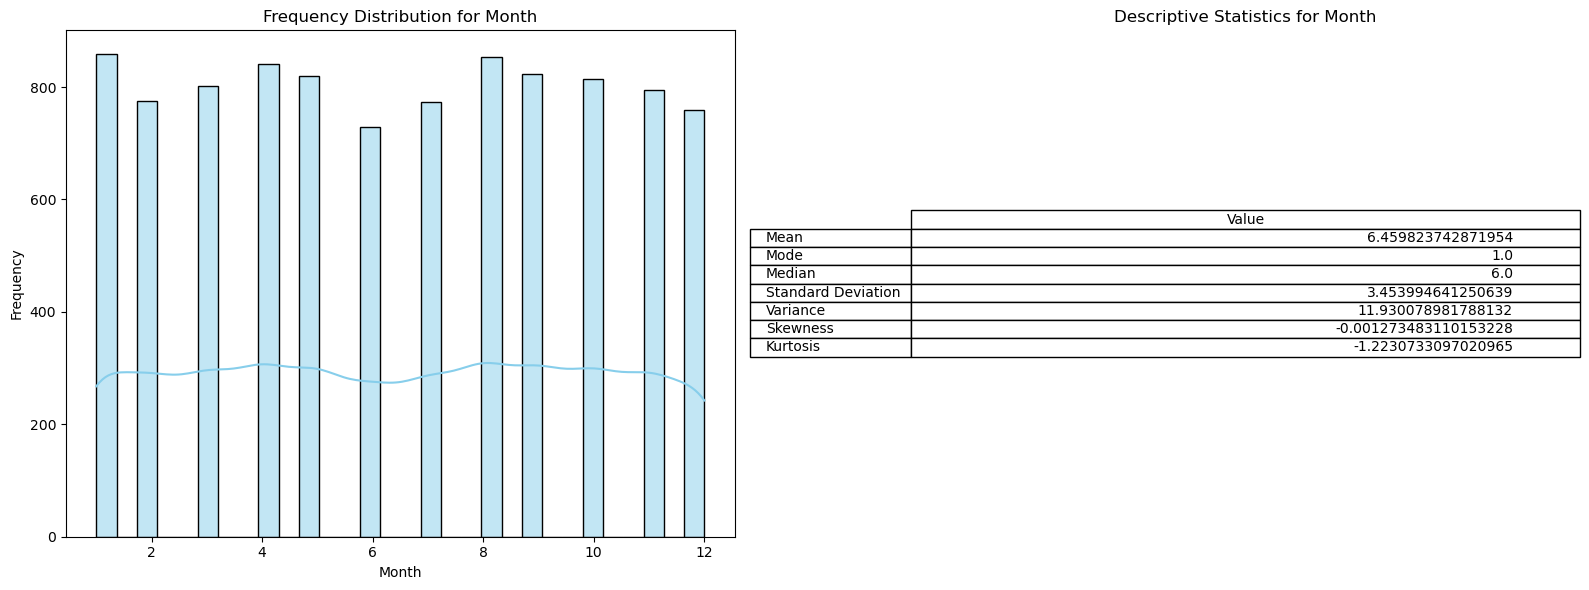

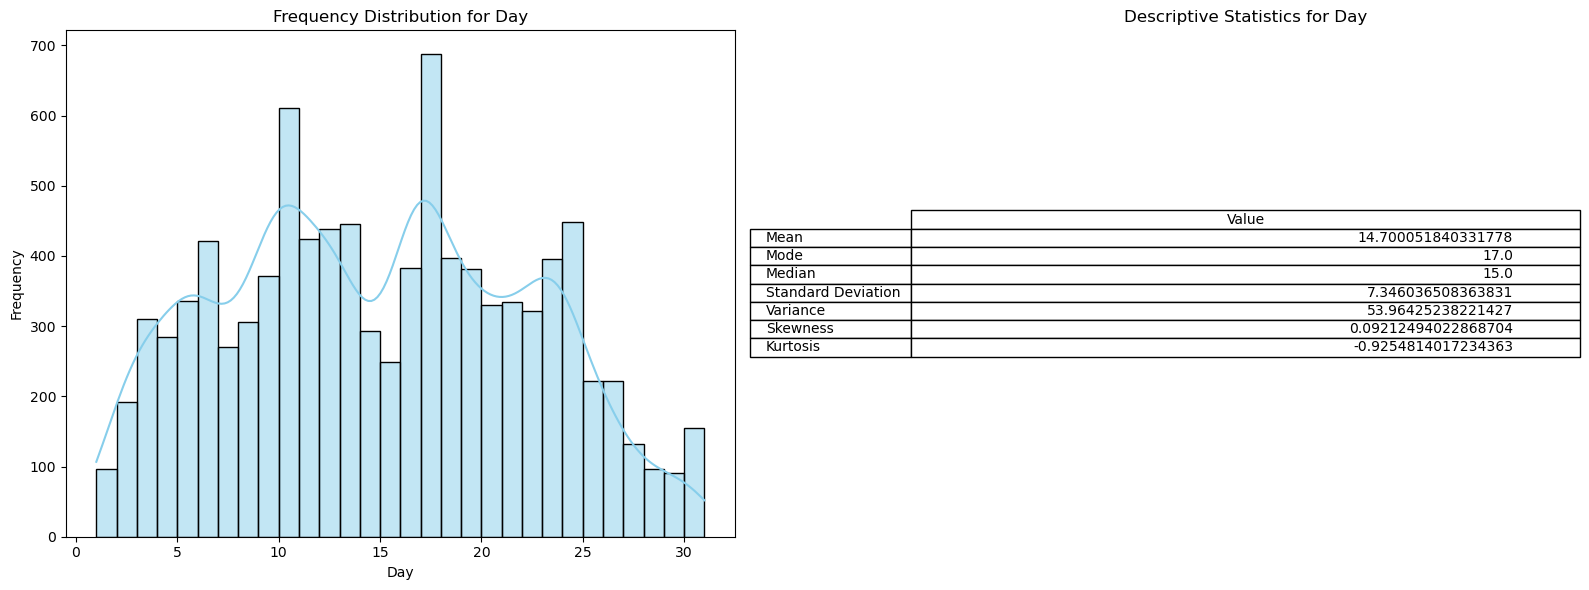

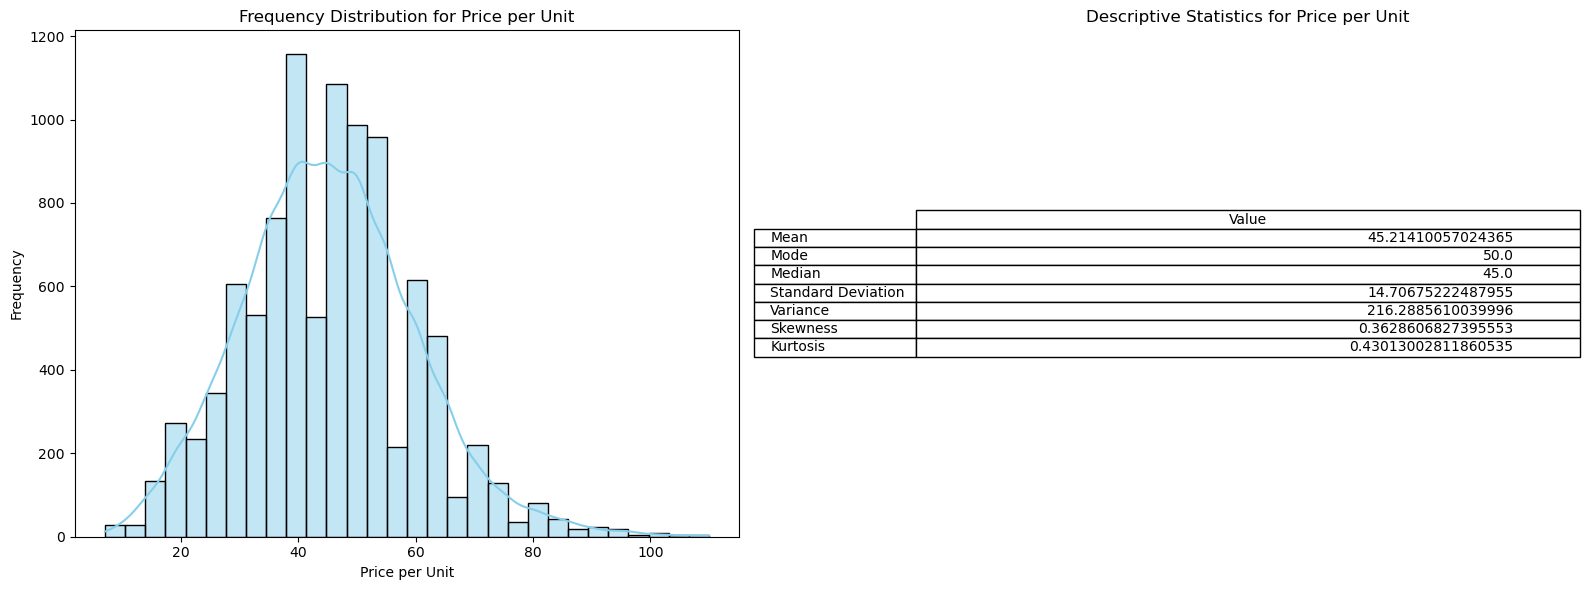

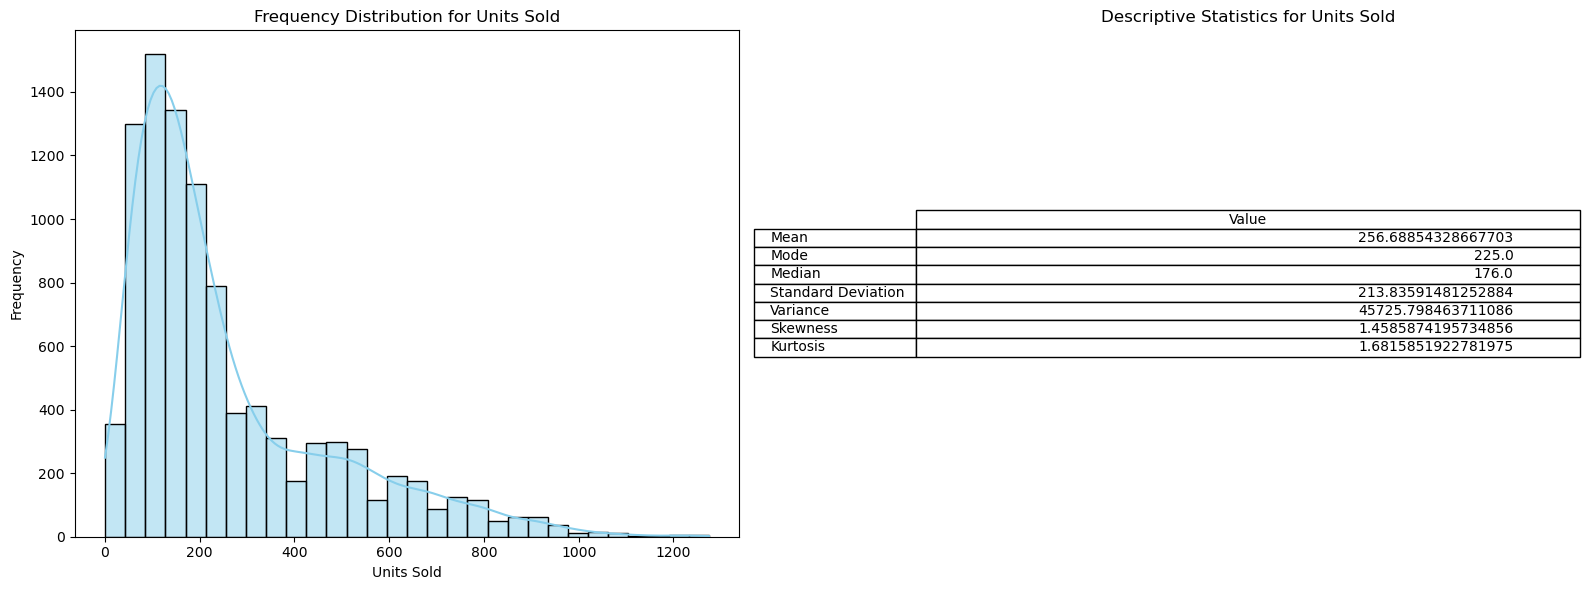

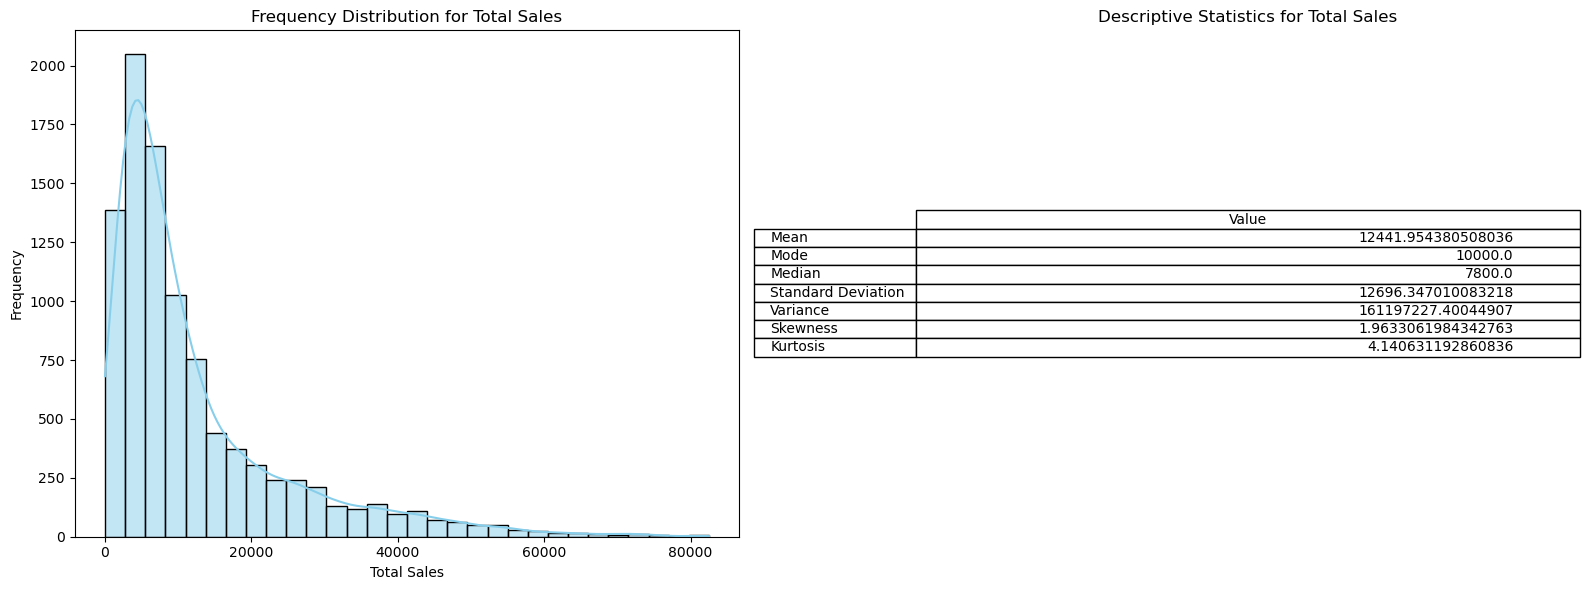

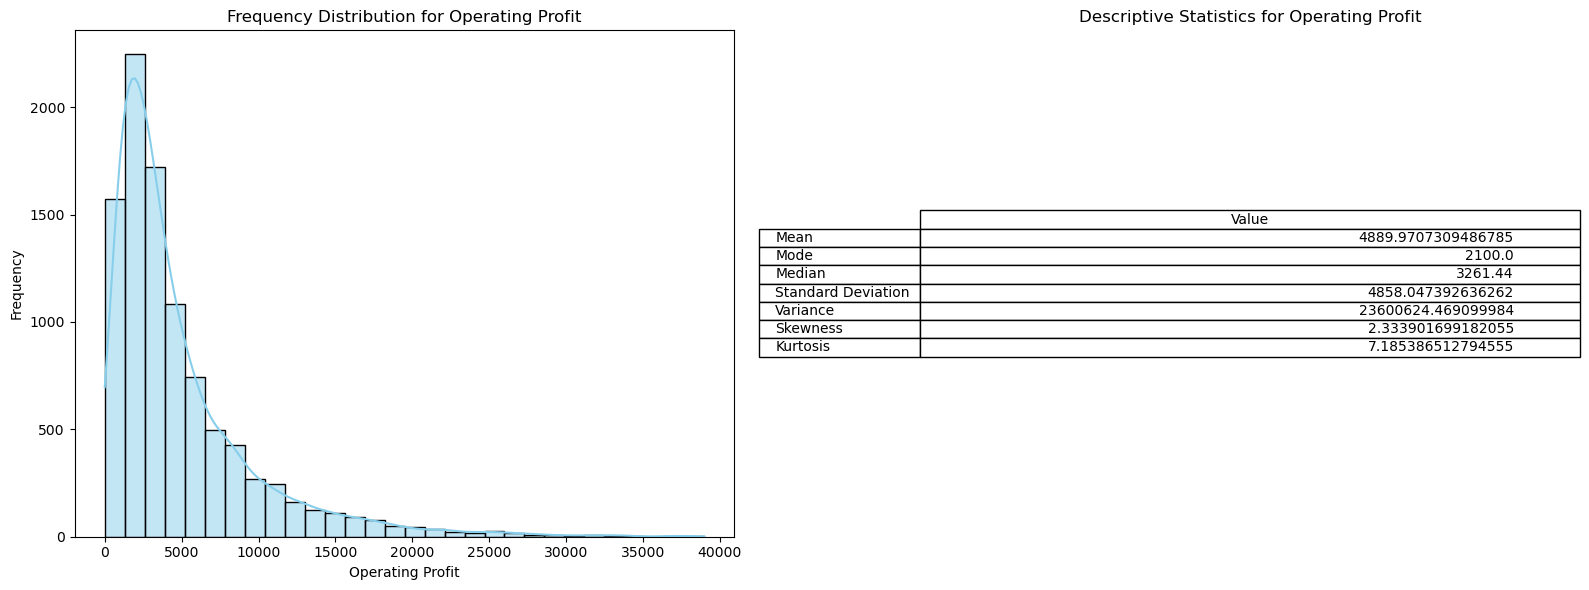

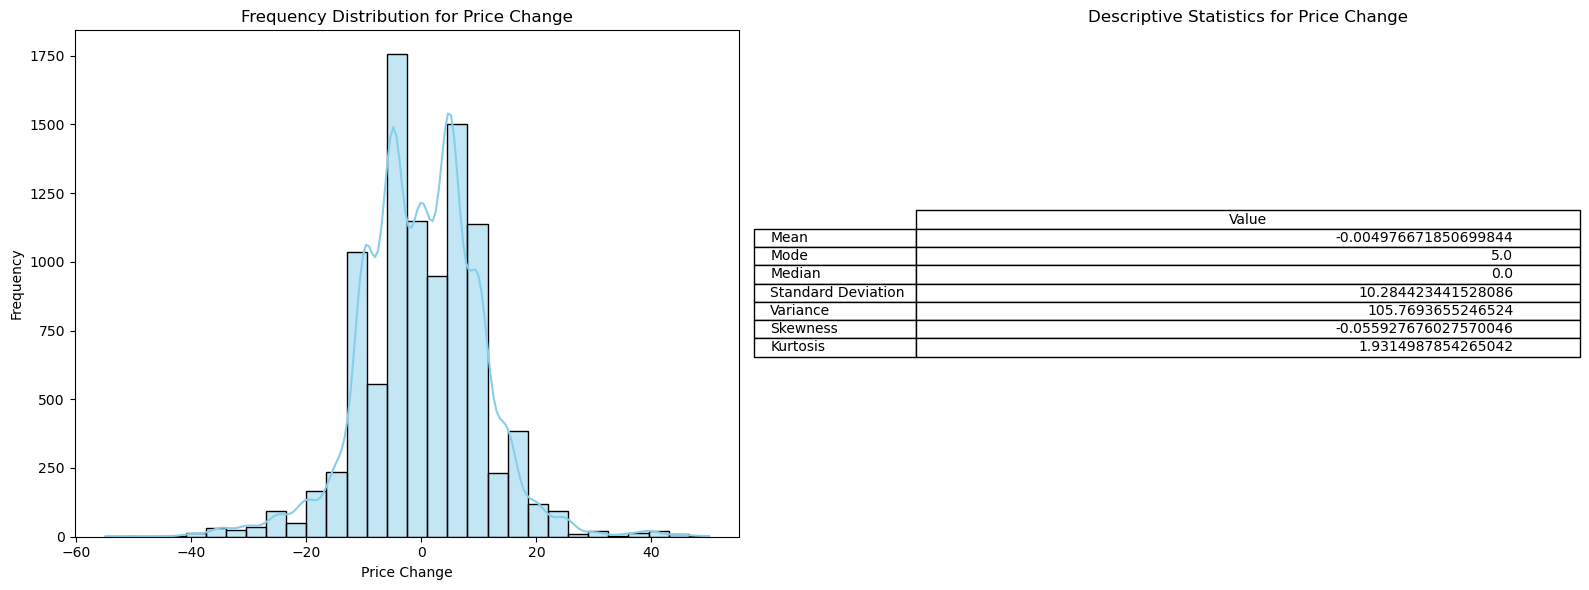

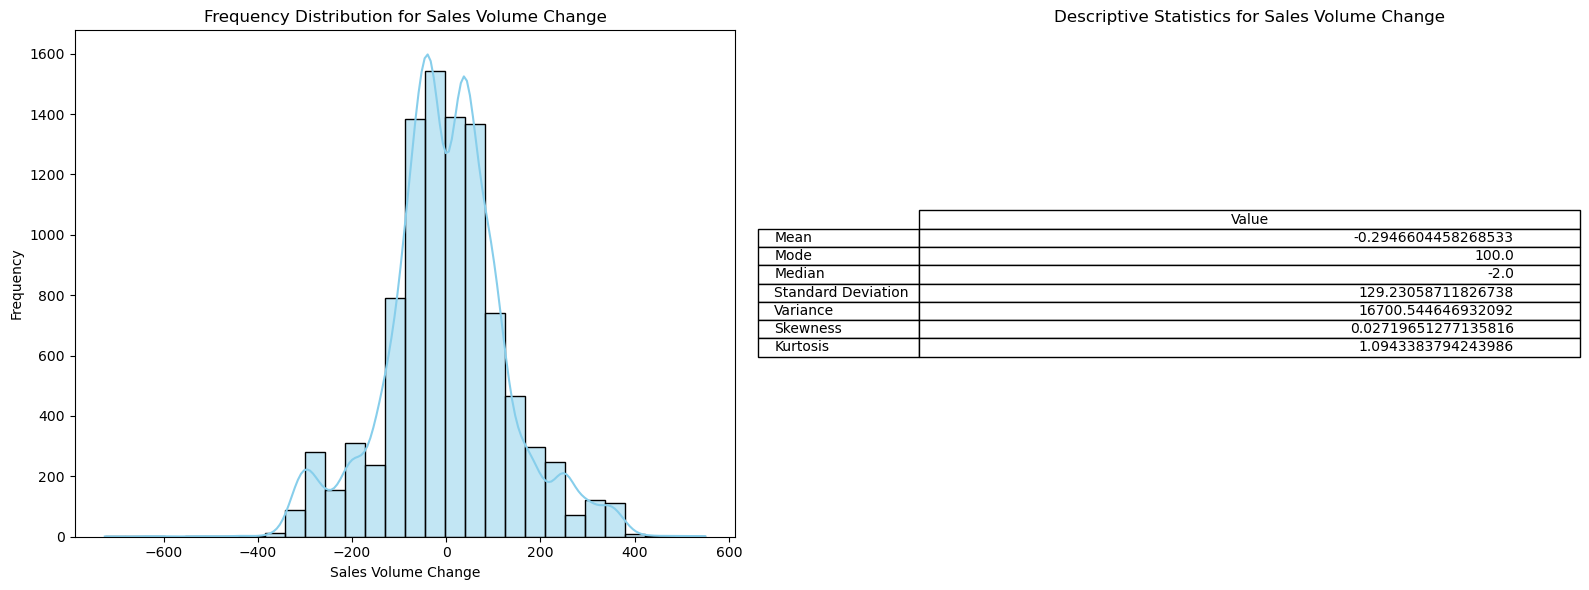

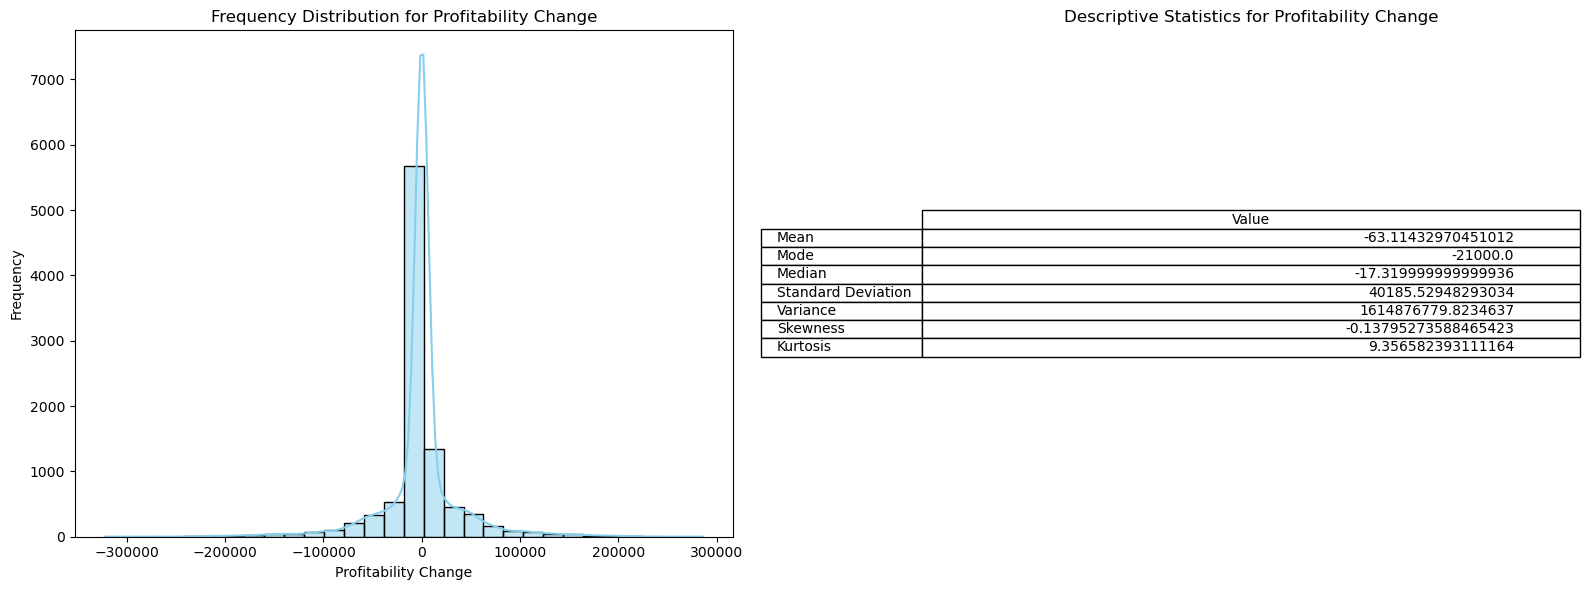

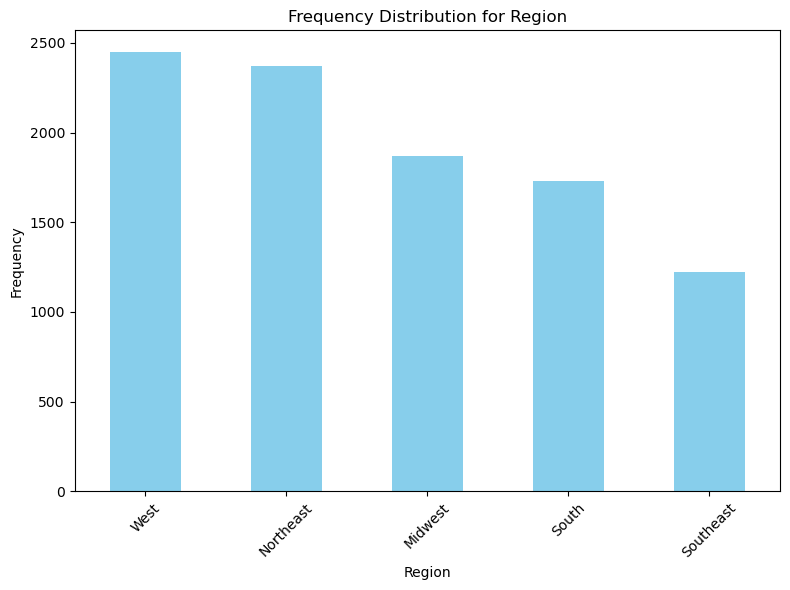

In [28]:
# Frequency distribution plot
# List of numeric and non-numeric columns
numeric_attributes = data.select_dtypes(include=['number']).columns
non_numeric_attributes = data.select_dtypes(exclude=['number']).columns

# Create a dictionary to store frequency distributions and descriptive statistics
frequency_distributions = {}
descriptive_stats = {}

# Calculate frequency distributions and descriptive statistics for numeric attributes
for attribute in numeric_attributes:
    descriptive_stats[attribute] = {
        'Mean': data[attribute].mean(),
        'Mode': data[attribute].mode(),
        'Median': data[attribute].median(),
        'Standard Deviation': data[attribute].std(),
        'Variance': data[attribute].var(),
        'Skewness': data[attribute].skew(),
        'Kurtosis': data[attribute].kurt()
    }

    # Plot frequency distribution and display descriptive statistics
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plot frequency distribution
    sns.histplot(data[attribute], bins=30, kde=True, ax=ax[0], color='skyblue')
    ax[0].set_title(f"Frequency Distribution for {attribute}")
    ax[0].set_xlabel(attribute)
    ax[0].set_ylabel("Frequency")

    # Display descriptive statistics
    stats_table = pd.DataFrame(descriptive_stats[attribute], index=[0])
    stats_table = stats_table.T
    stats_table.columns = ['Value']
    ax[1].axis('off')
    ax[1].table(cellText=stats_table.values, colLabels=stats_table.columns, rowLabels=stats_table.index, loc='center')
    ax[1].set_title(f"Descriptive Statistics for {attribute}")

    plt.tight_layout()
    plt.show()

# Plot frequency distribution for 'Region'
fig, ax = plt.subplots(figsize=(8, 6))
frequency_distribution = data['Region'].value_counts()
frequency_distribution.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title("Frequency Distribution for Region")
ax.set_xlabel("Region")
ax.set_ylabel("Frequency")
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

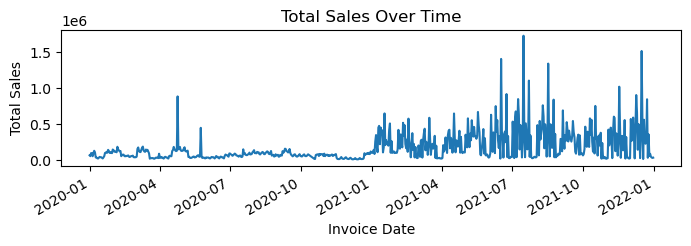

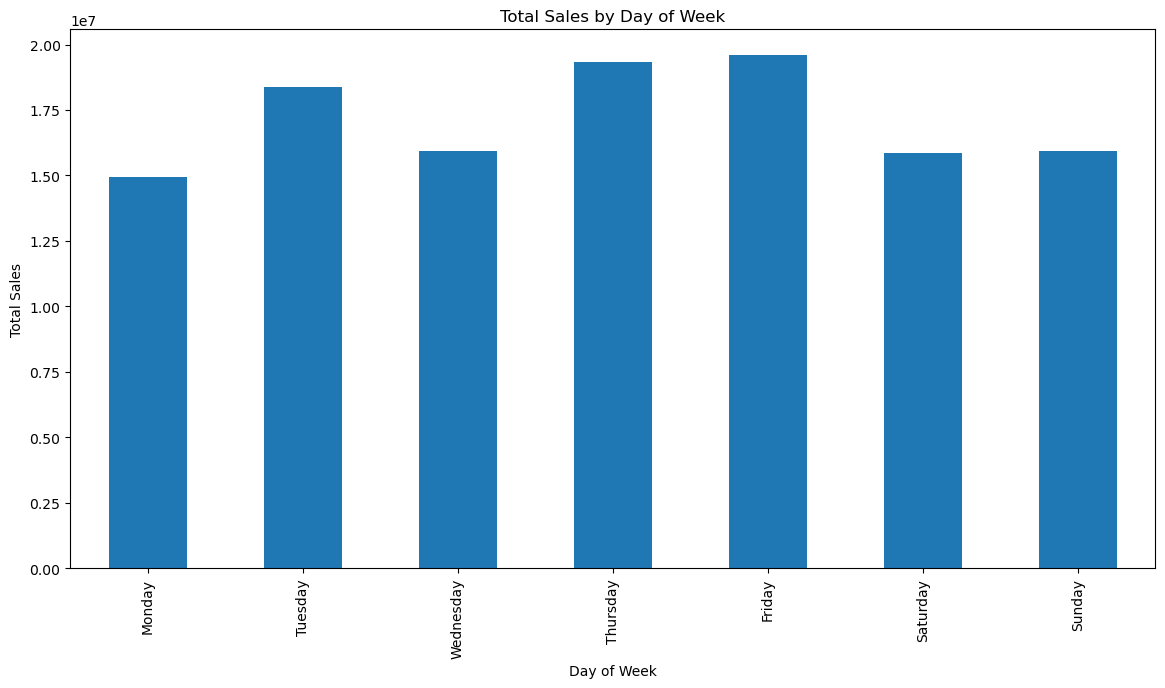

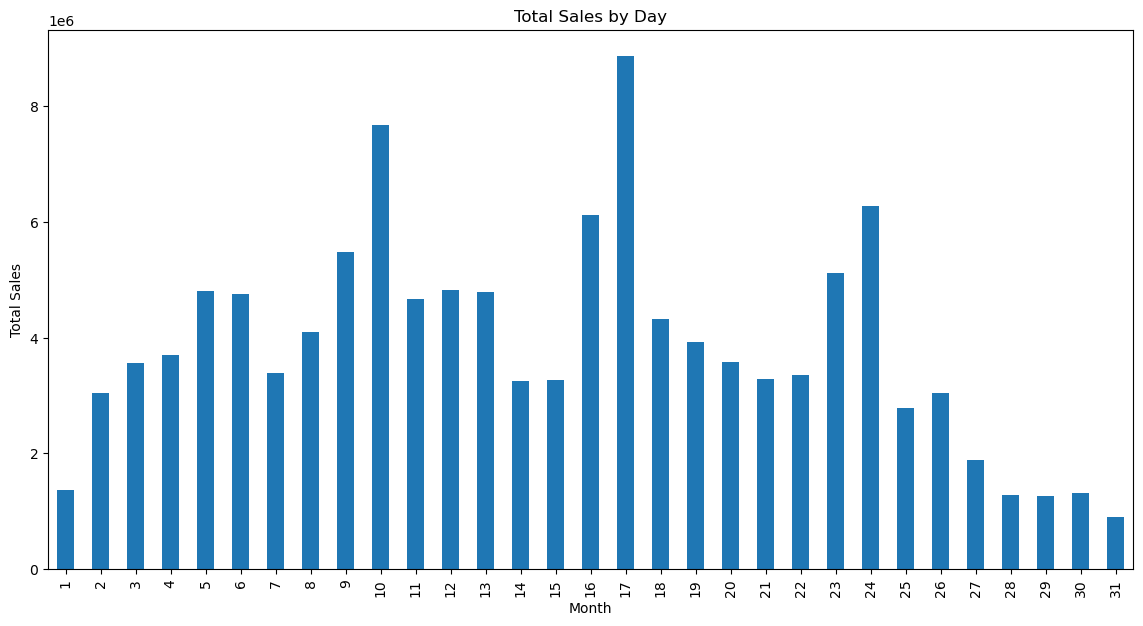

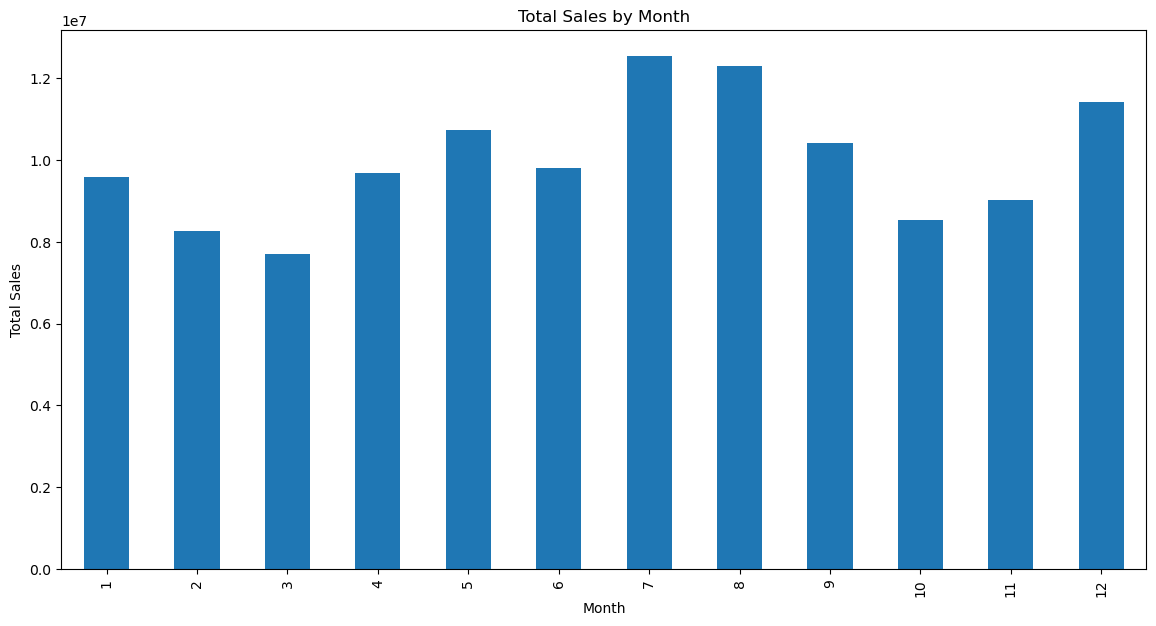

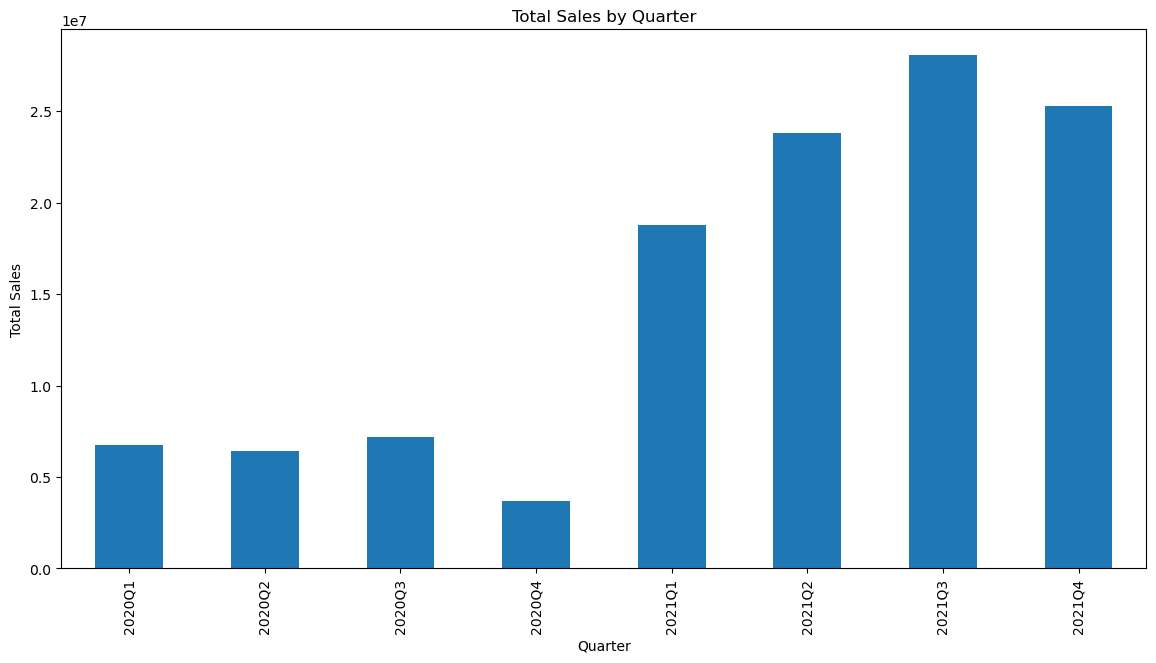

In [29]:
# Seasonal Sales Pattern
# Plot sales over time

plt.figure(figsize=(8,2))
data.groupby('Invoice Date')['Total Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.show()

# Convert 'Day' to a categorical type with a specific order
data['Day_of_Week'] = pd.Categorical(data['Day of Week'], 
                                     categories=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                     ordered=True)

# Plot sales by day of week to detect seasonality
plt.figure(figsize=(14,7))
data.groupby('Day_of_Week')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

# Plot sales by day to detect seasonality
plt.figure(figsize=(14,7))
data.groupby('Day')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Day')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Plot sales by month to detect seasonality
plt.figure(figsize=(14,7))
data.groupby('Month')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# Plot sales by quarter to detect seasonal trends
plt.figure(figsize=(14,7))
data.groupby('Quarter')['Total Sales'].sum().plot(kind='bar')
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

data = data.drop(columns=['Day_of_Week'])


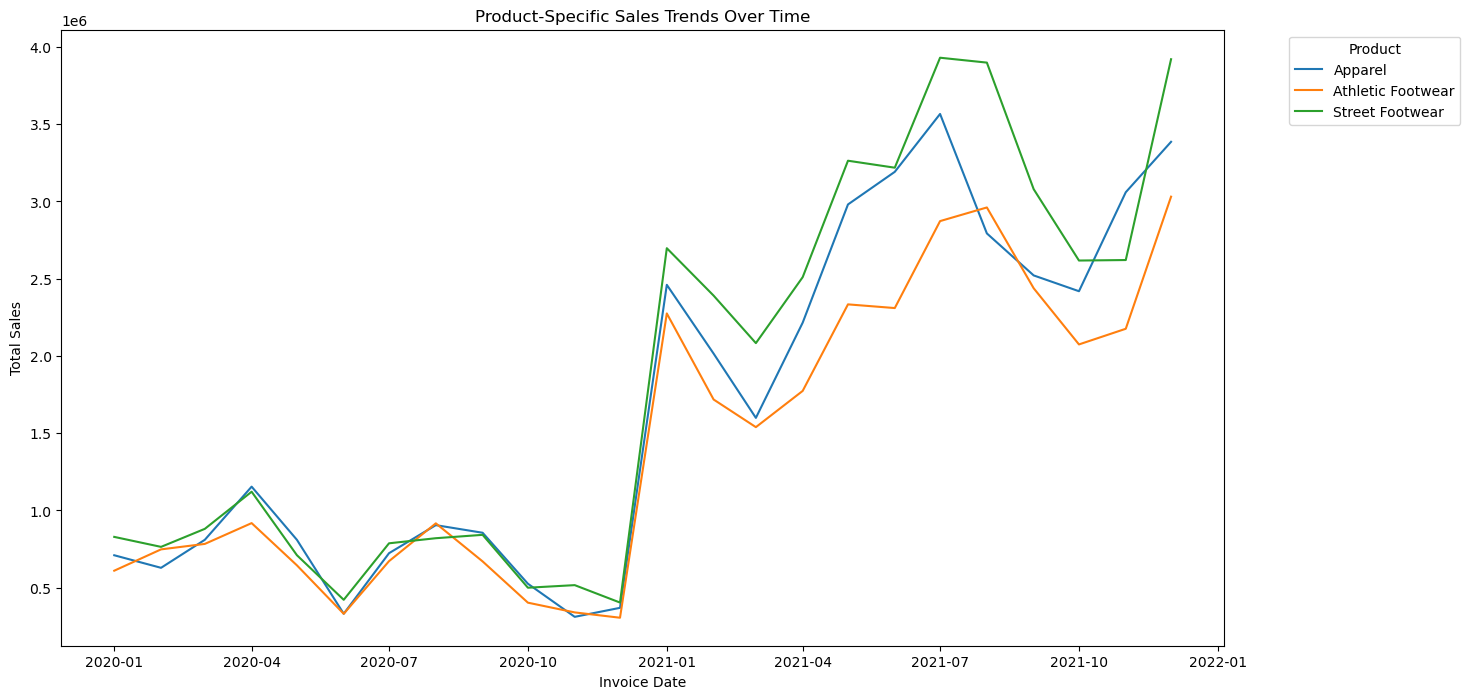

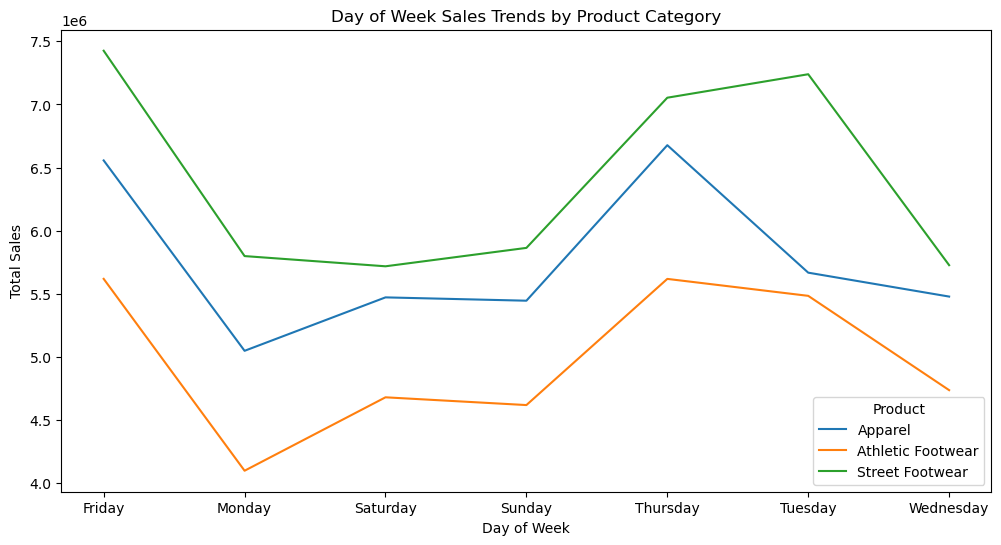

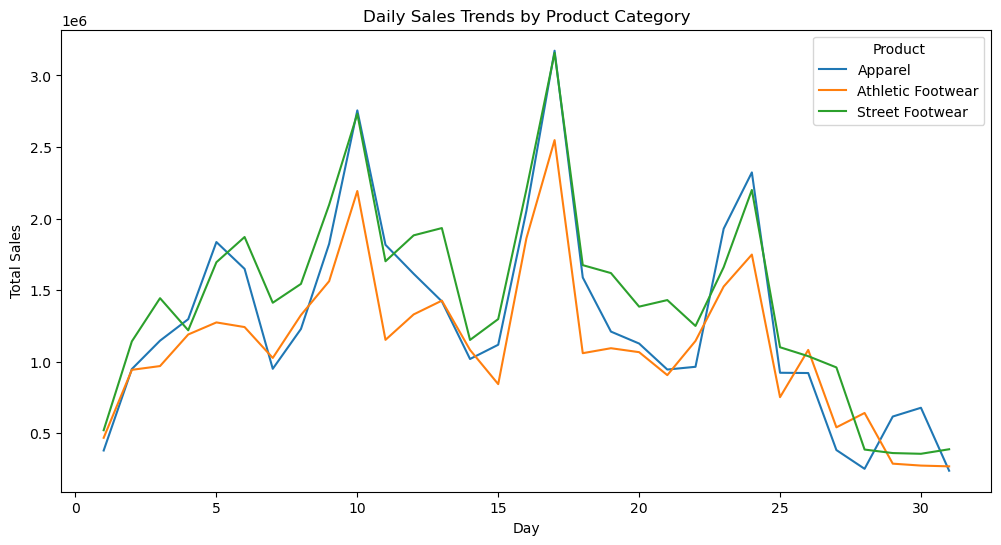

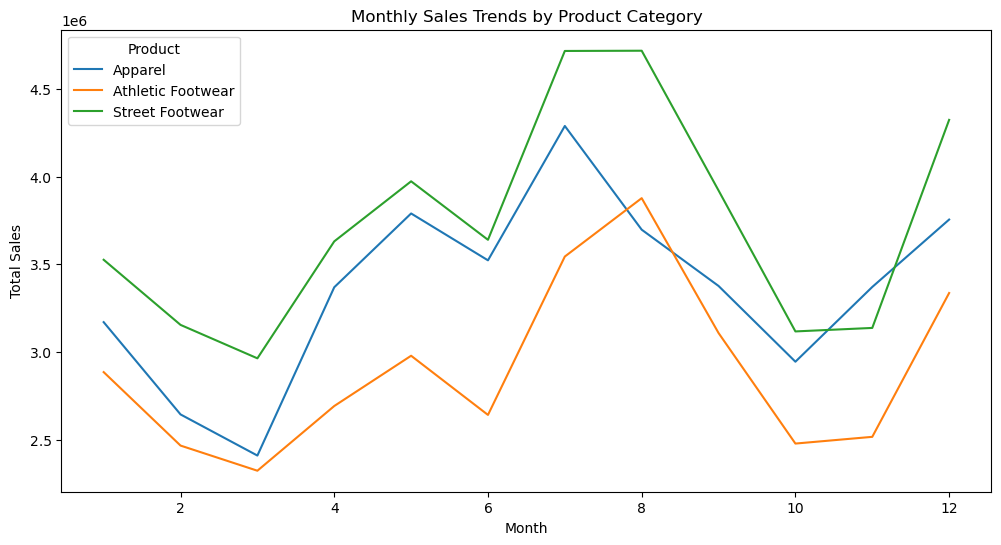

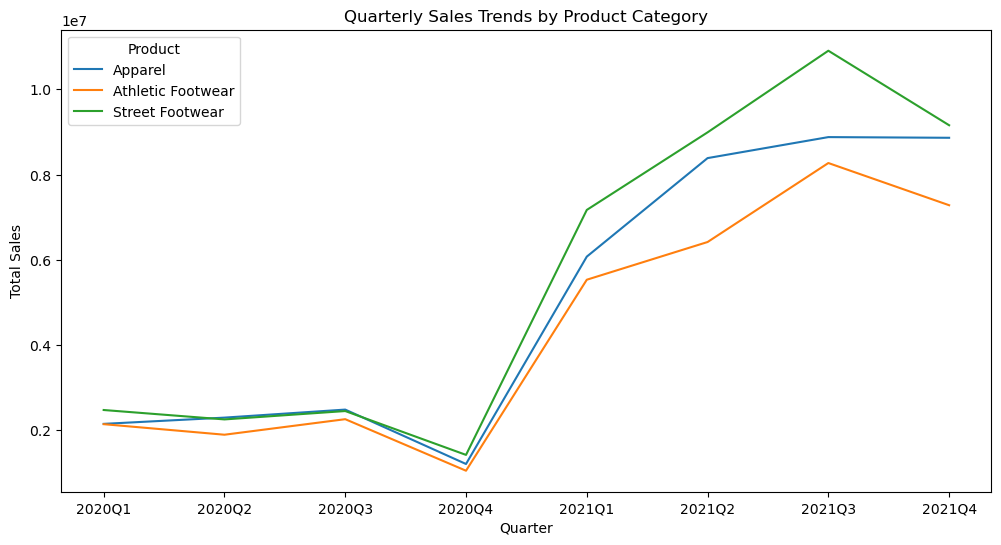

In [30]:
# Seasonal Sales Pattern by each product
dow_sales = data.groupby(['Product', 'Day of Week'])['Total Sales'].sum().reset_index()
daily_sales = data.groupby(['Product', 'Day'])['Total Sales'].sum().reset_index()
monthly_sales = data.groupby(['Product', 'Month'])['Total Sales'].sum().reset_index()
quarterly_sales = data.groupby(['Product', 'Quarter'])['Total Sales'].sum().reset_index()

def plot_product_sales_trends(data):
    # Aggregate sales by month and product type
    monthly_product_sales = data.groupby(['Year', 'Month', 'Product'])['Total Sales'].sum().reset_index()
    monthly_product_sales['Date'] = pd.to_datetime(monthly_product_sales[['Year', 'Month']].assign(DAY=1))
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x='Date', y='Total Sales', hue='Product', data=monthly_product_sales)
    plt.title('Product-Specific Sales Trends Over Time')
    plt.xlabel('Invoice Date')
    plt.ylabel('Total Sales')
    plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot product-specific sales trends
plot_product_sales_trends(data)

# Plot day of week sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=dow_sales, x='Day of Week', y='Total Sales', hue='Product')
plt.title('Day of Week Sales Trends by Product Category')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

# Plot daily sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_sales, x='Day', y='Total Sales', hue='Product')
plt.title('Daily Sales Trends by Product Category')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', hue='Product')
plt.title('Monthly Sales Trends by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()

quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)

# Plot quarterly sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='Quarter', y='Total Sales', hue='Product')
plt.title('Quarterly Sales Trends by Product Category')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Product')
plt.show()



2.	Correlation analysis of numerical columns

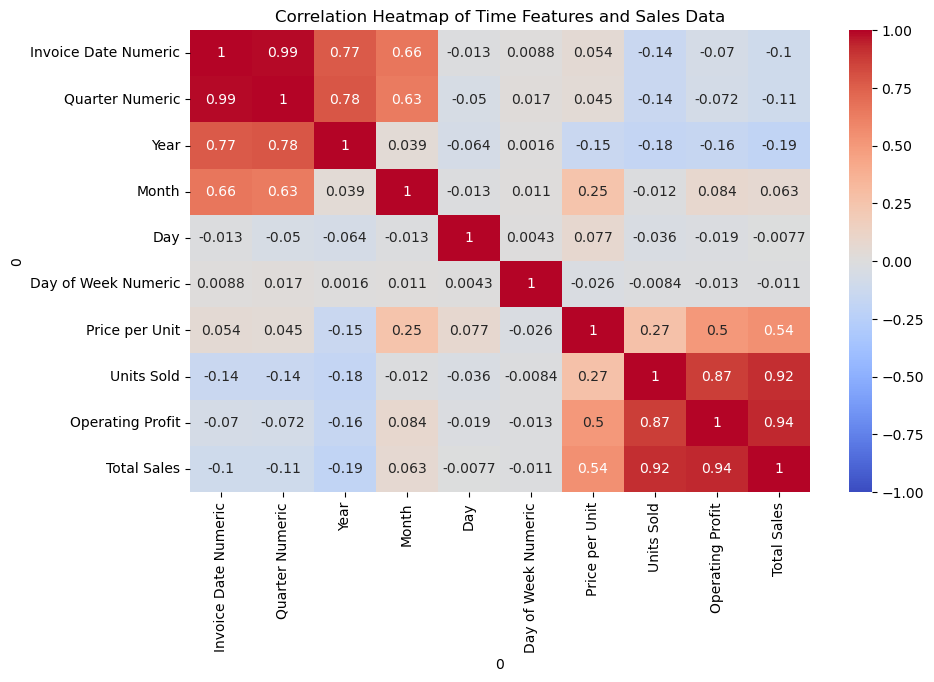

In [31]:
# correlation heatmap
# day of week mapping
day_of_week_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

def plot_overall_correlation_heatmap(data):
    data_copy = data.copy()
    
    # Convert attributes to ordinal
    data_copy['Invoice Date'] = pd.to_datetime(data_copy['Invoice Date'])
    data_copy['Invoice Date Numeric'] = data_copy['Invoice Date'].apply(lambda x: x.toordinal())
    data_copy['Quarter Numeric'] =  data_copy['Quarter'].apply(lambda x: x.qyear * 4 + x.quarter)

    # Map 'Day of Week' to numeric values
    data_copy['Day of Week Numeric'] = data_copy['Day of Week'].map(day_of_week_mapping)

    # Calculate the correlation matrix
    correlation_matrix = data_copy[['Invoice Date Numeric', 'Quarter Numeric', 'Year', 'Month', 'Day', 'Day of Week Numeric', 'Price per Unit', 'Units Sold', 'Operating Profit', 'Total Sales']].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Time Features and Sales Data')
    plt.show()

plot_overall_correlation_heatmap(data)

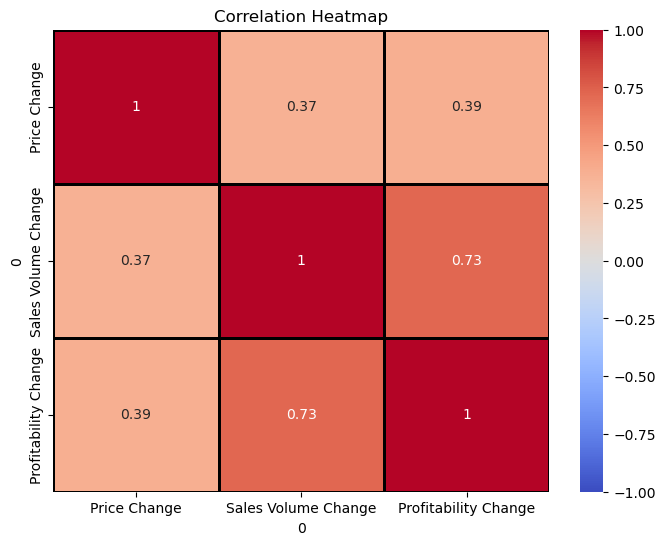

In [32]:
# Calculate the correlation matrix
corr_matrix = data[['Price Change', 'Sales Volume Change', 'Profitability Change']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17952\3604362048.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = data.resample('M', on='Invoice Date').mean()


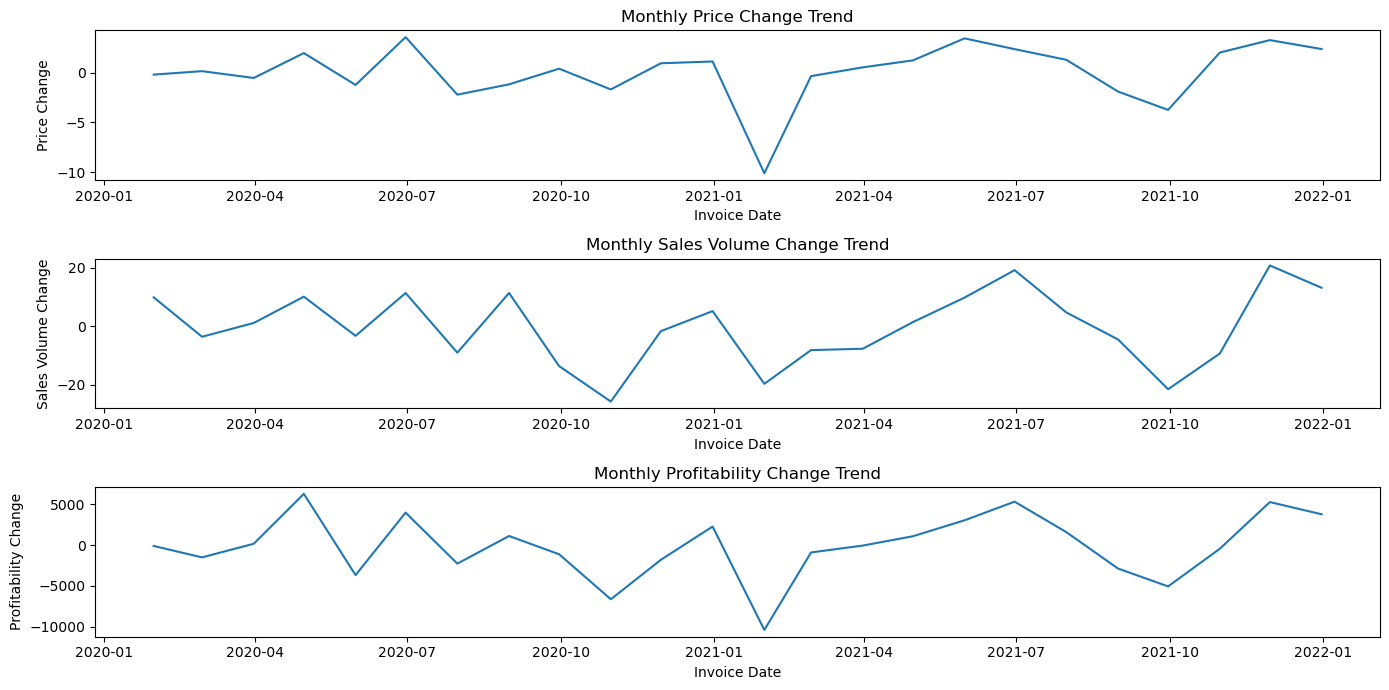

In [33]:
# Resample data to monthly frequency and calculate mean changes
monthly_data = data.resample('M', on='Invoice Date').mean()

# Plot trends over time
plt.figure(figsize=(14, 7))

# Price Change trend
plt.subplot(3, 1, 1)
sns.lineplot(x=monthly_data.index, y='Price Change', data=monthly_data)
plt.title('Monthly Price Change Trend')

# Sales Volume Change trend
plt.subplot(3, 1, 2)
sns.lineplot(x=monthly_data.index, y='Sales Volume Change', data=monthly_data)
plt.title('Monthly Sales Volume Change Trend')

# Profitability Change trend
plt.subplot(3, 1, 3)
sns.lineplot(x=monthly_data.index, y='Profitability Change', data=monthly_data)
plt.title('Monthly Profitability Change Trend')

plt.tight_layout()
plt.show()

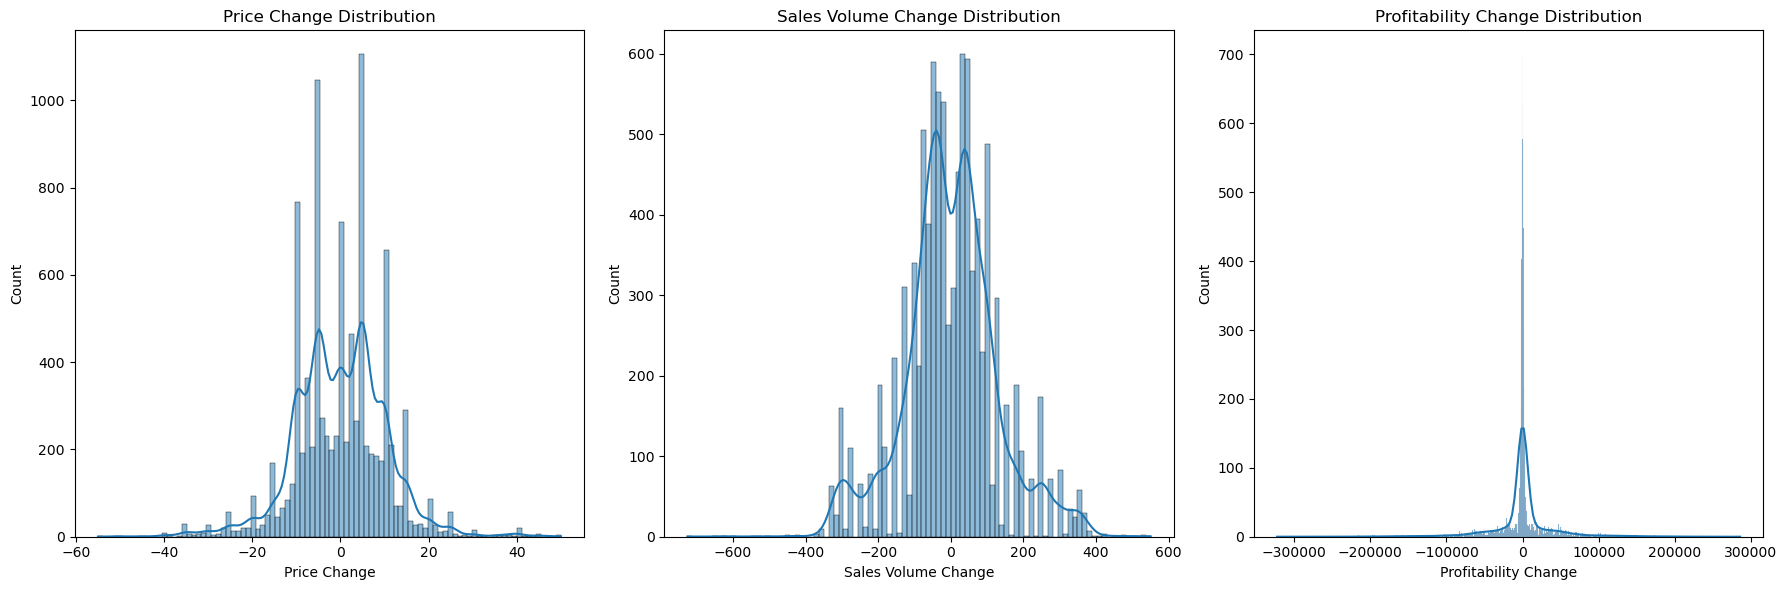

In [34]:
# normal distribution
plt.figure(figsize=(18, 6))

# normal distribution for price change
plt.subplot(1, 3, 1)
sns.histplot(data['Price Change'], kde=True)
plt.title('Price Change Distribution')

# normal distribution for sales volume change
plt.subplot(1, 3, 2)
sns.histplot(data['Sales Volume Change'], kde=True)
plt.title('Sales Volume Change Distribution')

# normal distribution for profitability change
plt.subplot(1, 3, 3)
sns.histplot(data['Profitability Change'], kde=True)
plt.title('Profitability Change Distribution')

plt.tight_layout()
plt.show()

### Formulate Hypotheses:
Null Hypothesis (H0): There is no significant effect of seasonal patterns (such as month, quarter, day of the week) on sales trends.
Alternative Hypothesis (H1): There is a significant effect of seasonal patterns on sales trends.

Conduct Statistical Tests with ANOVA to test if there are significant differences in sales across different seasons.

In [35]:
# hypothesis testing: ANOVA

data.loc[:, 'Month'] = data['Invoice Date'].dt.month
data.loc[:, 'Invoice_Date'] = data['Invoice Date']
data.loc[:, 'Quarter'] = data['Invoice Date'].dt.quarter
data.loc[:, 'Day_of_Week'] = data['Invoice Date'].dt.day_name()

# ANOVA: Sales by Invoice Date
formula_day_of_week = 'Q("Total Sales") ~ C(Invoice_Date)'
anova_day_of_week = ols(formula_day_of_week, data=data).fit()
anova_table_day_of_week = sm.stats.anova_lm(anova_day_of_week, typ=2)
print("ANOVA Table for Invoice Date:")
display(anova_table_day_of_week)

# ANOVA: Sales by Day of Week
formula_day_of_week = 'Q("Total Sales") ~ C(Day_of_Week)'
anova_day_of_week = ols(formula_day_of_week, data=data).fit()
anova_table_day_of_week = sm.stats.anova_lm(anova_day_of_week, typ=2)
print("ANOVA Table for Day of Week:")
display(anova_table_day_of_week)

# ANOVA: Sales by Day
formula_day_of_week = 'Q("Total Sales") ~ C(Day)'
anova_day_of_week = ols(formula_day_of_week, data=data).fit()
anova_table_day_of_week = sm.stats.anova_lm(anova_day_of_week, typ=2)
print("ANOVA Table for Day:")
display(anova_table_day_of_week)

formula_month = 'Q("Total Sales") ~ C(Month)'
anova_month = ols(formula_month, data=data).fit()
anova_table_month = sm.stats.anova_lm(anova_month, typ=2)
print("ANOVA Table for Month:")
display(anova_table_month)

# ANOVA: Sales by Quarter
formula_quarter = 'Q("Total Sales") ~ C(Quarter)'
anova_quarter = ols(formula_quarter, data=data).fit()
anova_table_quarter = sm.stats.anova_lm(anova_quarter, typ=2)
print("ANOVA Table for Quarter:")
display(anova_table_quarter)

ANOVA Table for Invoice Date:


,sum_sq,df,F,PR(>F)
C(Invoice_Date),2.887278e+11,723.0,2.814354,3.260110e-107
Residual,1.265858e+12,8921.0,NaN,NaN


ANOVA Table for Day of Week:


,sum_sq,df,F,PR(>F)
C(Day_of_Week),1.163433e+10,6.0,12.112248,1.305106e-13
Residual,1.542952e+12,9638.0,NaN,NaN


ANOVA Table for Day:


,sum_sq,df,F,PR(>F)
C(Day),2.535587e+10,30.0,5.313596,2.193640e-19
Residual,1.529230e+12,9614.0,NaN,NaN


ANOVA Table for Month:


,sum_sq,df,F,PR(>F)
C(Month),3.572136e+10,11.0,20.595757,7.448268e-42
Residual,1.518865e+12,9633.0,NaN,NaN


ANOVA Table for Quarter:


,sum_sq,df,F,PR(>F)
C(Quarter),1.876123e+10,3.0,39.257295,3.308267e-25
Residual,1.535825e+12,9641.0,NaN,NaN


Sine all PR(>F) (p-value): all very close to 0
All ANOVA tests show statistically significant results with very low p-values. This implies that the time periods have a significant impact on total sales of the products. 
Therefore, we can reject the null hypothesis in each case, suggesting that there are indeed differences in sales across different months, quarters, and days of the week.

In [36]:
# convert the quarter column back to original state after used 
data['Quarter'] = data['Invoice Date'].dt.to_period('Q')

# Question 1: <br>How do seasonal trends affect sales and profitability across different regions and product categories? 

In [37]:
# Data Modeling

# Convert 'Day of Week' to categorical type 
data['Day of Week'] = pd.Categorical(data['Day of Week'], 
                                     categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                     ordered=True)
# Separate features and target variable
X = data[['Year', 'Quarter', 'Month', 'Day', 'Day of Week']].copy()  # Copying to keep original intact
y = data['Total Sales']

# Numerical features (Year, Month, Day)
numerical_features = ['Year', 'Month', 'Day']
numerical_transformer = StandardScaler()

# Categorical features (Day of Week, Quarter)
categorical_features = ['Day of Week', 'Quarter']
categorical_transformer = OneHotEncoder()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))

coefficients = pd.Series(lr.coef_, index=preprocessor.get_feature_names_out())
print("Feature coefficients:")
print(coefficients)

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Random Forest Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression RMSE: 12211.632002332222
Feature coefficients:
num__Year                    -2108.955828
num__Month                     197.474264
num__Day                      -248.046974
cat__Day of Week_Friday        996.783756
cat__Day of Week_Monday       -669.775137
cat__Day of Week_Saturday    -1089.326063
cat__Day of Week_Sunday      -1024.025048
cat__Day of Week_Thursday     2224.718382
cat__Day of Week_Tuesday      -168.218302
cat__Day of Week_Wednesday    -270.157589
cat__Quarter_2020Q1          -1361.304472
cat__Quarter_2020Q2           4662.650698
cat__Quarter_2020Q3           2434.433055
cat__Quarter_2020Q4          -5015.818205
cat__Quarter_2021Q1          -1952.173196
cat__Quarter_2021Q2           -491.306775
cat__Quarter_2021Q3           1594.779049
cat__Quarter_2021Q4            128.739846
dtype: float64
Random Forest Regression RMSE: 12739.197339241911


<b>How do seasonal trends affect sales and profitability across different regions and product categories?</b>

### Answer:
Our data modeling approach investigated how seasonal trends impact sales and profitability across regions and product categories. Using linear regression, we found that certain days like Fridays and specific quarters positively influence sales, while years such as 2020 and days like Sundays have a negative impact. The model achieved an RMSE of approximately 12211.63, reflecting its predictive accuracy. Additionally, employing random forest regression provided insights into non-linear relationships, yielding a slightly higher RMSE of about 12739.2. This model highlighted key factors influencing sales and profitability. Overall, these findings emphasize the intricate nature of seasonal effects on business outcomes and the importance of utilizing diverse modeling techniques for comprehensive analysis.


# Question 2: <br>How does the pricing of products influence both sales volume and profitability across different types of products? 

In [38]:
# Prepare the data for regression
X = data[['Price Change', 'Product']] 
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variable 'Product' to dummy variables
y_sales = data['Sales Volume Change']
y_profit = data['Profitability Change']

# Split the data into training and testing sets
X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X, y_sales, test_size=0.2, random_state=42)
X_train_profit, X_test_profit, y_train_profit, y_test_profit = train_test_split(X, y_profit, test_size=0.2, random_state=42)

# Fit the regression model for sales volume change
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

# Predict and evaluate the model
y_pred_sales = model_sales.predict(X_test_sales)
print('Sales Volume Change Model')
print('Mean Squared Error:', mean_squared_error(y_test_sales, y_pred_sales))
print('R-squared:', r2_score(y_test_sales, y_pred_sales))

# Fit the regression model for profitability change
model_profit = LinearRegression()
model_profit.fit(X_train_profit, y_train_profit)

# Predict and evaluate the model
y_pred_profit = model_profit.predict(X_test_profit)
print('Profitability Change Model')
print('Mean Squared Error:', mean_squared_error(y_test_profit, y_pred_profit))
print('R-squared:', r2_score(y_test_profit, y_pred_profit))

Sales Volume Change Model
Mean Squared Error: 14610.981576769334
R-squared: 0.1315370564284809
Profitability Change Model
Mean Squared Error: 1578974173.66641
R-squared: 0.1485785049143058


<b>How does the pricing of products influence both sales volume and profitability across different types of products?</b>
### Answer
Both sales volume change and profitability change models showed limitations in predicting these outcomes, as indicated by relatively high Mean Squared Error (MSE) values. The model for sales volume change explained only 13.15% of its variance (R-squared = 0.1315), suggesting a weak relationship with 'Price Change' and 'Product'. Similarly, the profitability change model exhibited a higher MSE and explained 14.86% of its variance (R-squared = 0.1486), indicating a slightly stronger yet still inadequate relationship. These results emphasize the necessity of incorporating additional variables beyond price changes and product categories to better predict sales and profitability dynamics.

# Question 3: <br>What is the highest total units sold product category based on gender, and how does the price per unit for these categories vary across different states?

highest total unit sold product based on gender


Gender,Men,Women
Product,,
Apparel,305783,433827
Athletic Footwear,434526,317236
Street Footwear,592120,392269


Highest Total Unit Sold of Product:
Men: Street Footwear
Women: Apparel


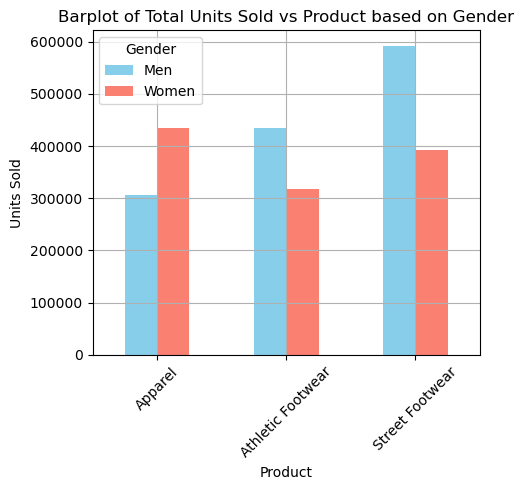

In [39]:
# highest total unit sold product based on gender
total_us = data.groupby(['Product', 'Gender'])['Units Sold'].sum().unstack()
print("highest total unit sold product based on gender")
display(total_us)

# find the product with the highest unit sold for each gender
max_us_men = total_us['Men'].idxmax()
max_us_women = total_us['Women'].idxmax()

print("Highest Total Unit Sold of Product:")
print("Men:", max_us_men)
print("Women:", max_us_women)

# barplot
total_us.plot(kind='bar', figsize=(5, 5), color=['skyblue','salmon'])
plt.title('Barplot of Total Units Sold vs Product based on Gender')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# price variation across states (descriptive statistics & average price)
max_us_men = total_us['Men'].idxmax()
max_us_women = total_us['Women'].idxmax()

# filter data for highest unit sold products
filtered_data_men = data[(data['Gender'] == 'Men') & (data['Product'] == max_us_men)]
filtered_data_women = data[(data['Gender'] == 'Women') & (data['Product'] == max_us_women)]

# group filtered data by state and calculate descriptive statistics for price per unit based on gender
stats_men = filtered_data_men.groupby('State')['Price per Unit'].describe()
stats_women = filtered_data_women.groupby('State')['Price per Unit'].describe()

# highest and lowest average price per unit for men
highest_avg_price_men = stats_men['mean'].idxmax()
lowest_avg_price_men = stats_men['mean'].idxmin()

# highest and lowest average price per unit for women
highest_avg_price_women = stats_women['mean'].idxmax()
lowest_avg_price_women = stats_women['mean'].idxmin()

print(f"Highest unit sold (Men) = {max_us_men}")
print(f"Highest average price per unit = {highest_avg_price_men}, {stats_men.loc[highest_avg_price_men, 'mean']:.2f}")
print(f"Lowest average price per unit = {lowest_avg_price_men}, {stats_men.loc[lowest_avg_price_men, 'mean']:.2f}")

print(f"\nHighest unit sold (Women) = {max_us_women}")
print(f"Highest average price per unit = {highest_avg_price_women}, {stats_women.loc[highest_avg_price_women, 'mean']:.2f}")
print(f"Lowest average price per unit = {lowest_avg_price_women}, {stats_women.loc[lowest_avg_price_women, 'mean']:.2f}")

# print("Descriptive Statistics for Men's Best-Selling Product:", max_us_men)
# display(stats_men)

# print("\nDescriptive Statistics for Women's Best-Selling Product:", max_us_women)
# display(stats_women)

Highest unit sold (Men) = Street Footwear
Highest average price per unit = Washington, 62.58
Lowest average price per unit = Utah, 28.78

Highest unit sold (Women) = Apparel
Highest average price per unit = Washington, 75.75
Lowest average price per unit = Utah, 32.11


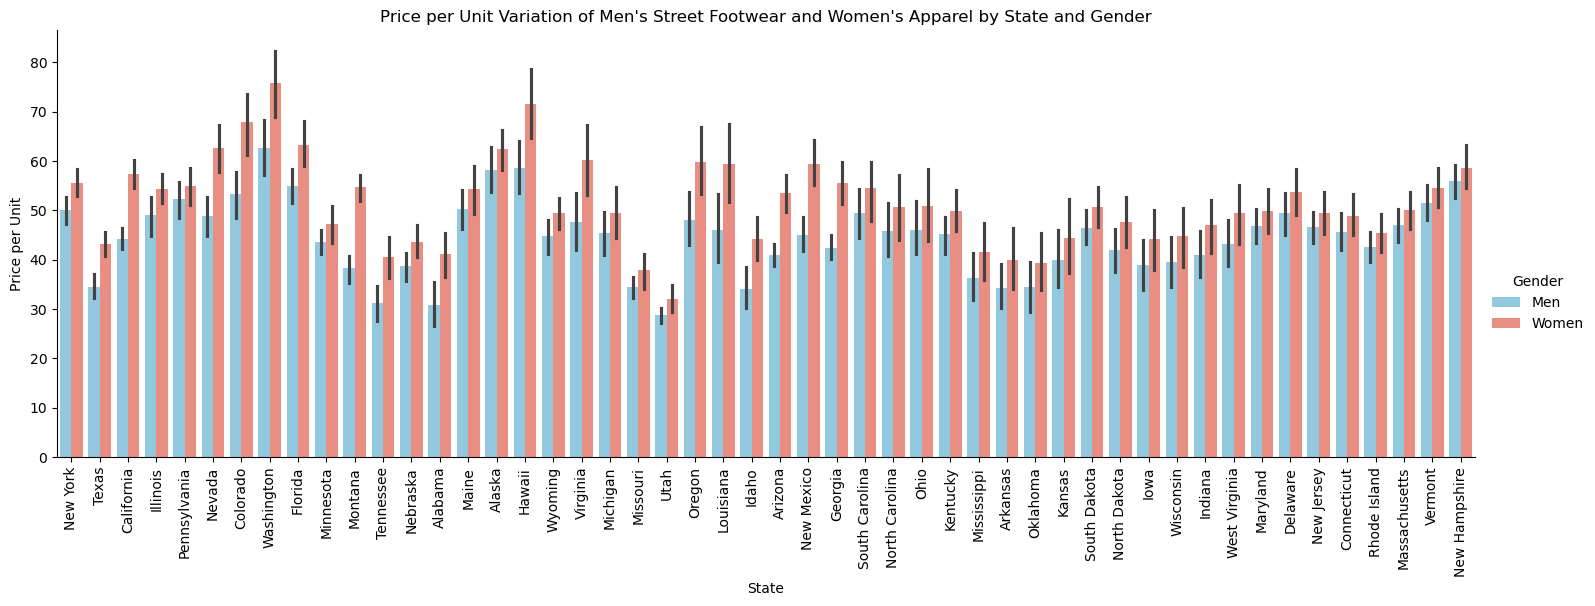

In [41]:
# barplot of price per unit variation by state & gender
# reference: https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot
# estimator = mean, ci = 95% (show point estimates and errors as rectangular bars)
combined_data = pd.concat([filtered_data_men, filtered_data_women])

graph = sns.catplot(x='State', y='Price per Unit', hue='Gender', data=combined_data,
                kind='bar', height=5, aspect=3, palette={'Men': 'skyblue', 'Women': 'salmon'})

graph.set_xticklabels(rotation=90)

plt.xlabel('State')
plt.ylabel('Price per Unit')
plt.title("Price per Unit Variation of Men's Street Footwear and Women's Apparel by State and Gender")
plt.show()

KMeans: Identify clustering of average Price per Unit of Men Street Footwear & Women Apparel across States

In [42]:
# function to calculate price per unit statistics for a given DataFrame
def calculate_price_stats(data):
    grouping_data = data.groupby('State')['Price per Unit'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
    return grouping_data

# calculate price statistics
men_street_footwear_stats = calculate_price_stats(filtered_data_men)
women_apparel_stats = calculate_price_stats(filtered_data_women)

# merge the statistics into a dataframe for clustering
stats_combined = pd.merge(men_street_footwear_stats, women_apparel_stats, on='State', suffixes=('_men_street', '_women_apparel'))

# drop states for clustering
features = stats_combined.drop('State', axis=1)
ss=StandardScaler()
scaled_features = ss.fit_transform(features)
scaled_features


array([[-1.84872141, -1.76596485,  0.83799138, -2.54829944, -0.45828586,
        -1.20601063, -1.42122815,  0.15338392, -1.7596155 , -0.24445886],
       [ 1.85295052,  2.01824554,  0.29677786,  1.26388614,  0.81473042,
         1.25637273,  1.49772485, -0.73660754,  1.73465641,  0.47453778],
       [-0.48305884, -0.38442772, -1.32651376,  0.38415101, -0.88262462,
         0.23051387,  0.18922868, -0.53282174,  0.36190673, -0.24445886],
       [-1.38597624, -2.00623217,  1.27683422, -1.37531926,  0.39039166,
        -1.33806781, -2.07547623,  1.29490341, -1.51002464,  0.11503946],
       [-0.0353623 ,  0.0360401 , -0.60546827, -0.05571656, -0.0339471 ,
         0.67660948,  0.74282321, -0.26567967,  0.11231588,  0.47453778],
       [ 1.17793295,  1.29744356,  0.17832464,  0.38415101,  0.39039166,
         1.89894366,  2.15197293,  0.54241304,  1.11067928,  0.8340361 ],
       [ 0.1602698 ,  0.15617376,  0.07210407, -0.20233908, -0.0339471 ,
        -0.32026122, -0.31403908, -0.13881423

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

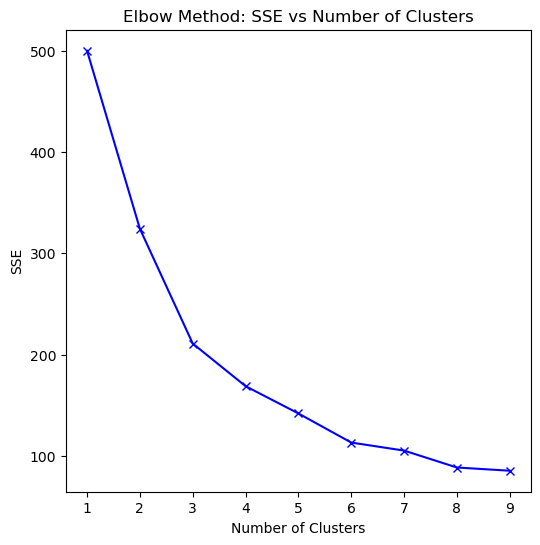

In [43]:
# find optimal clusters for kmeans
# elbow method
sse = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(scaled_features) 
    sse.append(kmeans.inertia_) 

plt.figure(figsize=(6, 6))
plt.plot(K, sse, 'bx-')
plt.title('Elbow Method: SSE vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

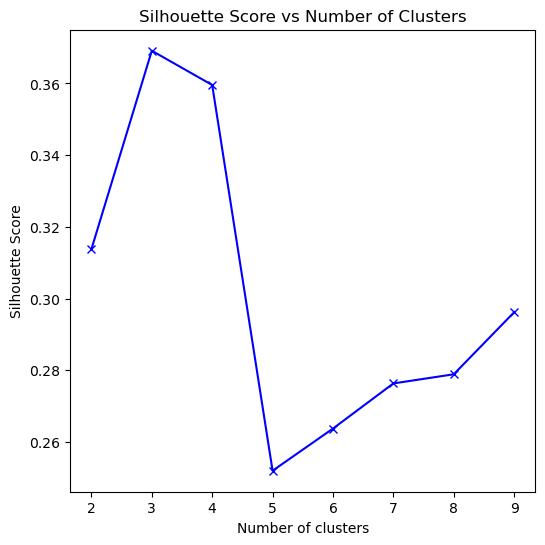

In [53]:
## find optimal clusters for kmeans
# silhouette score
sil_scores = []
K = range(2,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_features)
    clusters = kmeans.labels_
    sil_scores.append(silhouette_score(scaled_features, clusters))

plt.figure(figsize=(6, 6))
plt.plot(K, sil_scores, 'bx-')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Optimal number of clusters for kmeans = 3

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


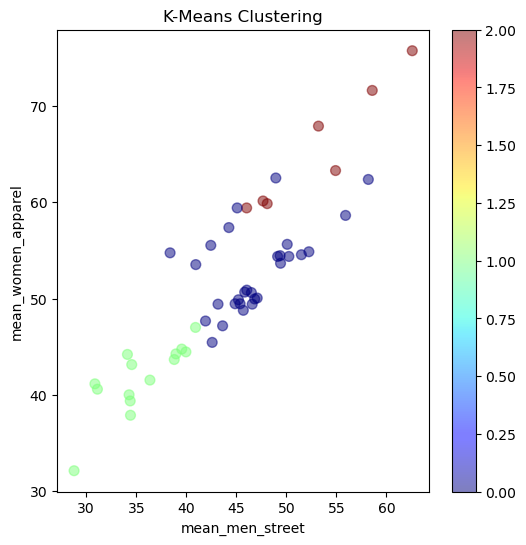

,State,mean_men_street,median_men_street,std_men_street,min_men_street,max_men_street,mean_women_apparel,median_women_apparel,std_women_apparel,min_women_apparel,max_women_apparel,Cluster
0,Alabama,30.861111,29.5,13.963530,7.0,60.0,41.138889,38.0,14.313136,14.0,70.0,1
1,Alaska,58.192308,61.0,12.289896,33.0,75.0,62.375000,67.0,10.961643,42.0,80.0,0
2,Arizona,40.944444,41.0,7.270073,27.0,55.0,53.527778,54.0,11.729051,31.0,70.0,0
3,Arkansas,34.277778,27.5,15.320595,15.0,70.0,40.000000,31.5,18.611824,16.0,75.0,1
4,California,44.250000,44.5,9.499815,24.0,65.0,57.375000,59.5,12.735044,29.0,80.0,0
5,Colorado,53.208333,55.0,11.923594,27.0,70.0,67.916667,73.5,15.778126,37.0,85.0,2
6,Connecticut,45.694444,45.5,11.595121,23.0,65.0,48.777778,49.0,13.212788,26.0,70.0,0
7,Delaware,49.416667,52.0,10.590877,32.0,65.0,53.666667,58.5,12.139288,33.0,70.0,0
8,Florida,54.916667,55.0,13.721555,30.0,95.0,63.300000,63.5,18.088577,33.0,110.0,2
9,Georgia,42.444444,42.0,7.658588,26.0,55.0,55.527778,57.5,12.876304,28.0,70.0,0


In [45]:
# kmeans
model = KMeans(3, verbose=0, n_init='auto', random_state=42)
model.fit(scaled_features)

# add kmeans label column
stats_combined['Cluster'] = model.labels_ 

# scatterplot
v1 = stats_combined['mean_men_street']
v2 = stats_combined['mean_women_apparel']
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
scatter = ax.scatter(v1, v2, c=stats_combined['Cluster'], s=50, cmap='jet', alpha=0.5)
ax.set_title('K-Means Clustering')
ax.set_xlabel(v1.name)
ax.set_ylabel(v2.name)
plt.colorbar(scatter)
plt.show()

# Output the clustered data
display(stats_combined)

<b>What is the highest total units sold product category based on gender, and how does the price per unit for these categories vary across different states?</b>
<br>
Answer: <br>
The highest total units sold product for Men is Street Footwear, while for Women is Apparel. <br>
From the bar chart (Price per Unit Variation of Men's Street Footwear and Women's Apparel by State and Gender), <br>
In most states, the price per unit for Women's Apparel is higher than Men's Street Footwear. States such as Washington, Hawaii and New Hampshire show higher prices per unit for both Men's Street Footwear and Women's Apparel while states such as Missouri, Utah and Tennessee have relatively lower price per unit.

From the scatter plot (Kmeans Clustering), <br>
Average price per unit of Men's Streetwear and Women's Apparel are divided into 3 clusters (0, 1 and 2). Cluster 0 contains moderate average price per unit for both Men's Streetwear and Women's Apparel, Cluster 1 contains states with lower average prices for both product categories, while cluster 2 contains states with higher average prices. States within the same cluster have similar price trends for men's footwear and women's apparel.

# Question 4. <br> Is there a significant difference in total sales across cities between weekdays and weekends?


In [46]:
# check if there is a significant difference in weekday sales vs weekend sales in cities
# group data by weekday and weekend
data['Weekday_Weekend'] = data['Day of Week'].apply(lambda day: 'Weekday' if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')
city_sales = data.groupby(['City', 'Weekday_Weekend'])['Total Sales'].sum().reset_index()

# total sales per city for normalization
city_totals = city_sales.groupby('City')['Total Sales'].sum()

# proportions of weekday and weekend sales
city_sales['Proportion'] = city_sales.apply(lambda row: row['Total Sales'] / city_totals[row['City']], axis=1)

display(city_sales)

,City,Weekday_Weekend,Total Sales,Proportion
0,Albany,Weekday,2485660.0,0.830129
1,Albany,Weekend,508644.0,0.169871
2,Albuquerque,Weekday,1843947.0,0.652808
3,Albuquerque,Weekend,980694.0,0.347192
4,Anchorage,Weekday,1211189.0,0.669007
...,...,...,...,...
99,St. Louis,Weekend,286579.0,0.240921
100,Wichita,Weekday,823376.0,0.671971
101,Wichita,Weekend,401938.0,0.328029
102,Wilmington,Weekday,1050610.0,0.696443


In [47]:
# split weekday & weekend sales across city
weekday_sales = city_sales[city_sales['Weekday_Weekend'] == 'Weekday']['Total Sales']
weekend_sales = city_sales[city_sales['Weekday_Weekend'] == 'Weekend']['Total Sales']

In [48]:
# skewness of weekday & weekend sales across city
skew_weekday = skew(weekday_sales)
skew_weekend = skew(weekend_sales)

print(f"Skewness:")
print(f"Weekday sales - Skewness: {skew_weekday}")
print(f"Weekend sales - Skewness: {skew_weekend}")

Skewness:
Weekday sales - Skewness: 0.6717071102180048
Weekend sales - Skewness: 0.999953206726675


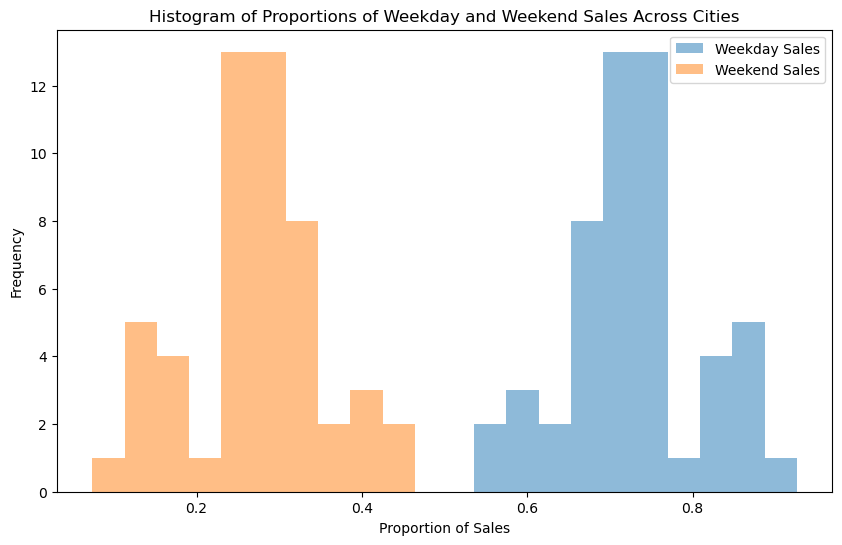

In [49]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(city_sales[city_sales['Weekday_Weekend'] == 'Weekday']['Proportion'], bins=10, alpha=0.5, label='Weekday Sales')
plt.hist(city_sales[city_sales['Weekday_Weekend'] == 'Weekend']['Proportion'], bins=10, alpha=0.5, label='Weekend Sales')
plt.legend()
plt.title('Histogram of Proportions of Weekday and Weekend Sales Across Cities')
plt.xlabel('Proportion of Sales')
plt.ylabel('Frequency')
plt.show()

Weekday and weekends sales are not normally distributed. The proportions of weekday sales are mostly concentrated around higher values (0.6 to 0.8), indicating that in many cities, a larger proportion of sales occurs on weekdays. The proportions of weekend sales are mostly concentrated around lower values (0.2 to 0.4), indicating that in many cities, a smaller proportion of sales occurs on weekends.
Hence, we will use the Mann-Whitney U test.

In [50]:
# check for equal variance
alpha = 0.05
stat, p = levene(
        city_sales[city_sales['Weekday_Weekend'] == 'Weekday']['Total Sales'],
        city_sales[city_sales['Weekday_Weekend'] == 'Weekend']['Total Sales']
    )

print("Levene test results:")
print(f'Statistic: {stat}, p-value: {p}')
if p < alpha:
    print("The variances are significantly different from each other")
else:
    print("The variances are not significantly different from each other")

Levene test results:
Statistic: 33.61615403185936, p-value: 7.556330668512953e-08
The variances are significantly different from each other


p-value for Levene test is lesser than alpha. Hence, the variances are significantly different from each other. We will use Mann-Whitney U test for test statistics.

In [51]:
# not normally distributed & no equal variances, perform MWU-test
alpha = 0.05
# mwu test
# Perform Mann-Whitney U test
stat, p_value = mannwhitneyu(
    city_sales[city_sales['Weekday_Weekend'] == 'Weekday']['Total Sales'],
    city_sales[city_sales['Weekday_Weekend'] == 'Weekend']['Total Sales']
)

print("Mann-Whitney U test results:")
print(f'Statistic: {stat}, p-value: {p}')
if p_value < alpha:
    print("There is a significant difference in total sales between weekdays and weekends.")
else:
    print("There is no significant difference in total sales between weekdays and weekends.")

Mann-Whitney U test results:
Statistic: 2433.0, p-value: 7.556330668512953e-08
There is a significant difference in total sales between weekdays and weekends.


p-value is lesser than alpha = 0.05. Hence, there is a significant difference in total sales between weekdays and weekends.

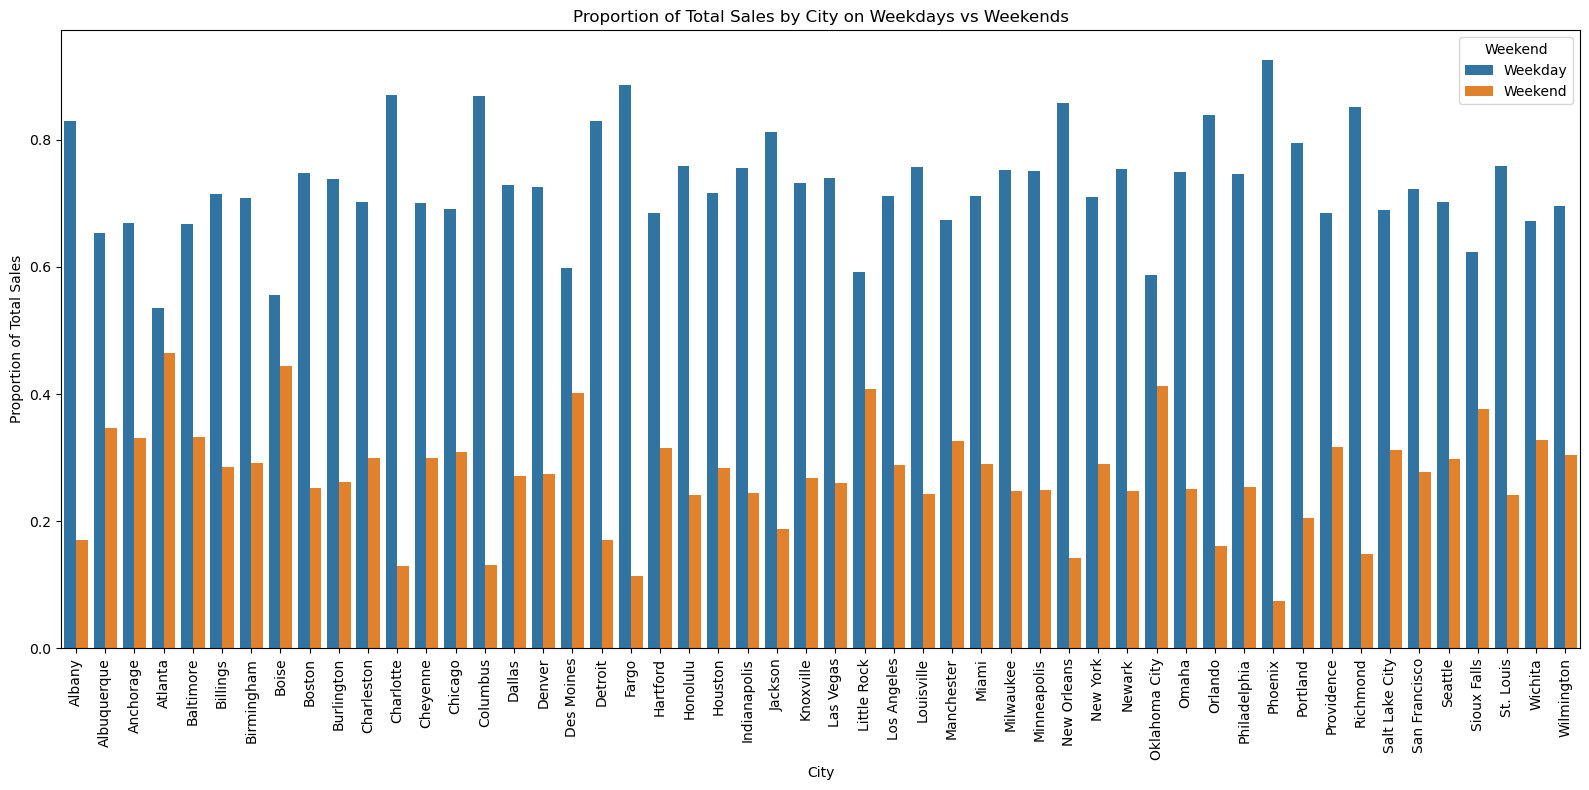

In [52]:
# barplot of Proportion of Total Sales by City on Weekdays vs Weekends
plt.figure(figsize=(16, 8))
sns.barplot(x='City', y='Proportion', hue='Weekday_Weekend', data=city_sales, estimator=sum, errorbar=None)
plt.title('Proportion of Total Sales by City on Weekdays vs Weekends')
plt.xlabel('City')
plt.ylabel('Proportion of Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()

<b>Is there a significant difference in total sales across cities between weekdays and weekends?</b> <br>
Answer: <br>
Yes. There is a significant difference in total sales across cities between weekdays and weekends. 
The proportions of weekday sales are mostly concentrated around higher values (0.6 to 0.8), indicating that in many cities, a larger proportion of sales occurs on weekdays. The proportions of weekend sales are mostly concentrated around lower values (0.2 to 0.4), indicating that in many cities, a smaller proportion of sales occurs on weekends. p-value in Mann-Whitney U test is lesser than alpha, indicates that there is a significance difference in the total sales on weekdays and weekends across cities. The bar plot also indicates that across most cities, a larger proportion of total sales occurs on weekdays compared to weekends. This trend is consistent but varies in magnitude from city to city.